In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("autocasion.csv")

df.head()

C:\Users\34629\AppData\Local\Temp\ipykernel_25916\3587508825.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("autocasion.csv")


Fecha de matriculación Kilómetros      Cambio Potencia (cv)  Garantía  \
0                02/2023   3.900 km      Manual           179  12 meses   
1                06/2023   4.000 km      Manual           180  24 meses   
2                09/2023       1 km  Automático           154  36 meses   
3                10/2023       7 km  Automático           154  36 meses   
4                08/2023      10 km  Automático           154  36 meses   

                                               Color Distintivo ambiental  \
0                                              Negro                    C   
1                                               Gris                    C   
2  Azul Poisson (metalizado)\n                   ...          0 EMISIONES   
3                                     PUNKN METALLIC          0 EMISIONES   
4                                              Verde          0 EMISIONES   

     largo    ancho     alto  ...          combustible cilindrada_cm3  \
0      NaN      NaN      NaN  ...                  NaN            NaN   
1      NaN      NaN      NaN  ...                  NaN            NaN   
2  3673 mm  1682 mm  1518 mm  ...  Corriente eléctrica            0.0   
3  3673 mm  1682 mm  1518 mm  ...  Corriente eléctrica            0.0   
4  3673 mm  1682 mm  1518 mm  ...  Corriente eléctrica            0.0   

   cilindros sobrealimentacion urbano  carretera medio  co2  deposito  \
0        NaN               NaN    NaN        NaN   NaN  NaN       NaN   
1        NaN               NaN    NaN        NaN   NaN  NaN       NaN   
2        NaN             Turbo   0,00       0,00  0,00    -      0,00   
3        NaN             Turbo   0,00       0,00  0,00    -      0,00   
4        NaN             Turbo   0,00       0,00  0,00    -      0,00   

     precio  
0  29.000 €  
1  30.500 €  
2  43.800 €  
3  38.990 €  
4  35.990 €  

[5 rows x 26 columns]

In [4]:
df.shape

(106431, 26)

In [5]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

Fecha de matriculación     0.025369
Kilómetros                 0.025369
Cambio                     0.062952
Potencia (cv)              0.025369
Garantía                   5.504975
Color                      0.025369
Distintivo ambiental       7.888679
largo                     26.196315
ancho                     26.196315
alto                      26.196315
batalla_mm                26.196315
maletero_l                26.196315
peso_masa_kg              26.196315
carroceria                26.196315
puertas                   26.196315
plazas                    26.196315
combustible               26.196315
cilindrada_cm3            26.196315
cilindros                 28.478545
sobrealimentacion         26.196315
urbano                    26.196315
carretera                 26.196315
medio                     26.196315
co2                       26.196315
deposito                  26.196315
precio                     0.025369
dtype: float64


In [6]:
df = df.dropna(subset=['precio'])

In [7]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

Fecha de matriculación     0.000000
Kilómetros                 0.000000
Cambio                     0.037593
Potencia (cv)              0.000000
Garantía                   5.480997
Color                      0.000000
Distintivo ambiental       7.865306
largo                     26.177587
ancho                     26.177587
alto                      26.177587
batalla_mm                26.177587
maletero_l                26.177587
peso_masa_kg              26.177587
carroceria                26.177587
puertas                   26.177587
plazas                    26.177587
combustible               26.177587
cilindrada_cm3            26.177587
cilindros                 28.460396
sobrealimentacion         26.177587
urbano                    26.177587
carretera                 26.177587
medio                     26.177587
co2                       26.177587
deposito                  26.177587
precio                     0.000000
dtype: float64


In [8]:
df.shape

(106404, 26)

In [9]:
df["Fecha_mes"] = np.nan

df["Fecha_año"] = df['Fecha de matriculación']

filas_con_mes = df['Fecha de matriculación'].str.contains('/')

df.loc[filas_con_mes, "Fecha_mes"] = df.loc[filas_con_mes, 'Fecha de matriculación'].str.split('/').str[0].astype("Int64")
df.loc[filas_con_mes, "Fecha_año"] = df.loc[filas_con_mes, 'Fecha de matriculación'].str.split('/').str[1].astype("Int64")

In [10]:
#df = df.drop(columns=['Fecha de matriculación'])

In [11]:
#La columna del año me sale tipo objeto y luego la trata como categórica
#La vuelvo a cambiar con errors="coerce" para asegurarme de que se convierte a entero

df['Fecha_año'] = pd.to_numeric(df['Fecha_año'], errors="coerce")

df['Fecha_año'].dtype

dtype('int64')

In [12]:
df.shape

(106404, 27)

In [13]:
df["Kilómetros"] = df["Kilómetros"].str.split(' ').str[0].str.replace(".","")

df["Kilómetros"] = df["Kilómetros"].astype(float)

In [14]:
df["Potencia (cv)"] = df["Potencia (cv)"].replace("-",np.nan).astype(float)


In [15]:
df["Garantía"] = df["Garantía"].str.split(' ').str[0].replace("Sí",np.nan).replace("No",0).astype(float)

In [16]:
df = df.drop(columns=['Color'])

In [17]:
df.shape

(106404, 26)

In [18]:
df["largo"] = df["largo"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [19]:
df["ancho"] = df["ancho"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [20]:
df["alto"] = df["alto"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [21]:
df.rename(columns={"maletero_l": "Maletero"}, inplace=True)    

df["maletero_1"]=df["Maletero"].str.split('/').str[0].astype(float)

df["maletero_2"]=df["Maletero"].str.split('/').str[1].astype(float)

In [22]:
df = df.drop(columns=['Maletero'])

In [23]:
df["puertas"] = df["puertas"].replace("-","").replace("", np.nan).astype(float)

In [24]:
df["sobrealimentacion"] = df["sobrealimentacion"].replace("-",np.nan)

In [25]:
df["urbano"] = df["urbano"].str.replace(",", ".").astype(float)

In [26]:
df["carretera"] = df["carretera"].str.replace(",", ".").astype(float)

In [27]:
df["medio"] = df["medio"].str.replace(",", ".").astype(float)

In [28]:
df["co2"] = df["co2"].replace("-", 0).astype(float)

In [29]:
df["deposito"] = df["deposito"].str.replace(",", ".").astype(float)

In [30]:
df["precio"] = df["precio"].str.split(' ').str[0].str.replace(".", "").replace("Consultar", np.nan).astype(float)

In [31]:
df.shape

(106404, 27)

In [32]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continuous_columns = df.select_dtypes(include=['Int64', 'float', 'int']).columns


def metricas (df, columna):
    
    if columna in categorical_columns:
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        sns.countplot(data=df, x=columna)
        plt.title(f'Distribución de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=columna, y='precio')
        plt.title(f'Boxplot de {columna} con precio')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()
    
    elif columna in continuous_columns:

        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 3, 1)
        sns.histplot(df[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        
        
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[columna])
        plt.title(f'Boxplot de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=df[columna], y=df['precio'])
        plt.title(f'Scatterplot de {columna} con precio')
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [33]:
categorical_columns

Index(['Cambio', 'Distintivo ambiental', 'carroceria', 'combustible',
       'sobrealimentacion'],
      dtype='object')

In [34]:
len(categorical_columns)

5

In [35]:
continuous_columns

Index(['Kilómetros', 'Potencia (cv)', 'Garantía', 'largo', 'ancho', 'alto',
       'batalla_mm', 'peso_masa_kg', 'puertas', 'plazas', 'cilindrada_cm3',
       'cilindros', 'urbano', 'carretera', 'medio', 'co2', 'deposito',
       'precio', 'Fecha_mes', 'Fecha_año', 'maletero_1', 'maletero_2'],
      dtype='object')

In [36]:
len(continuous_columns)

22

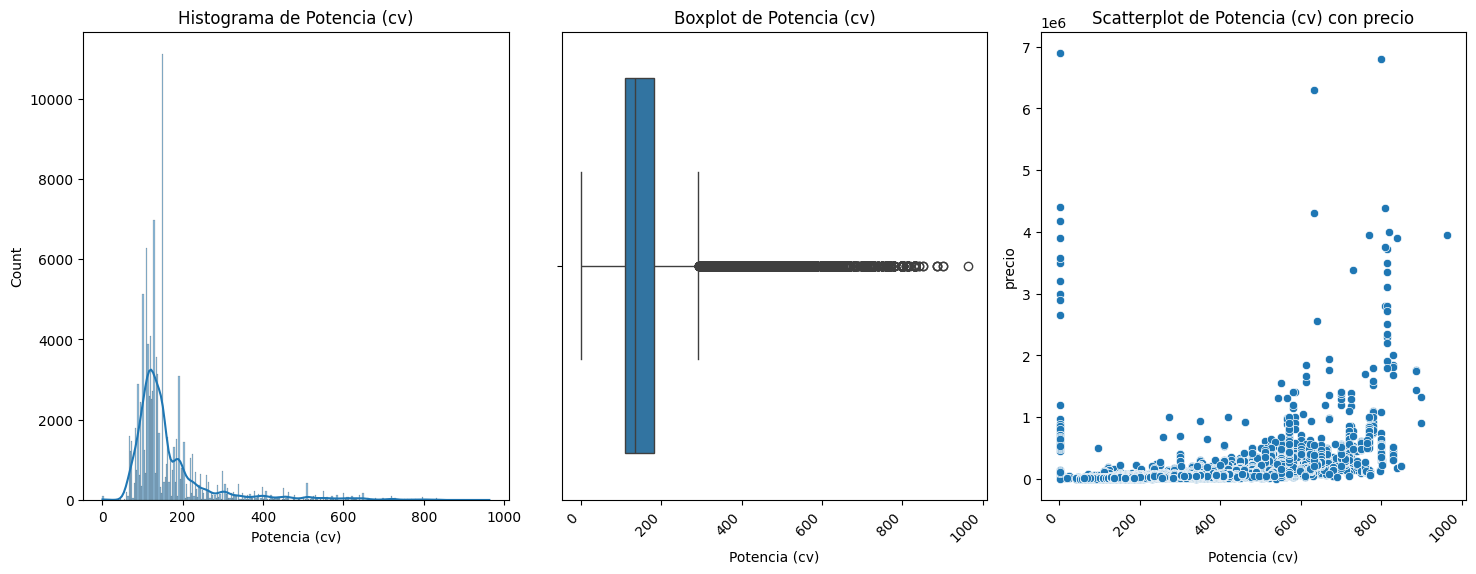

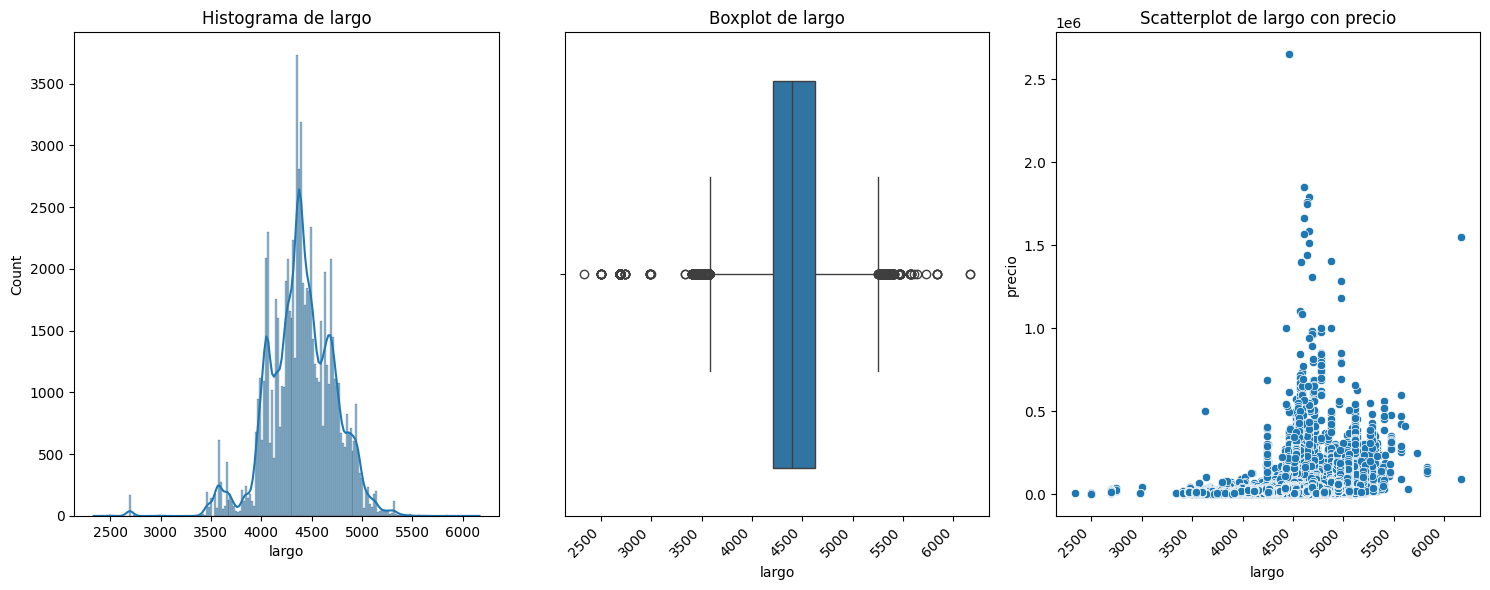

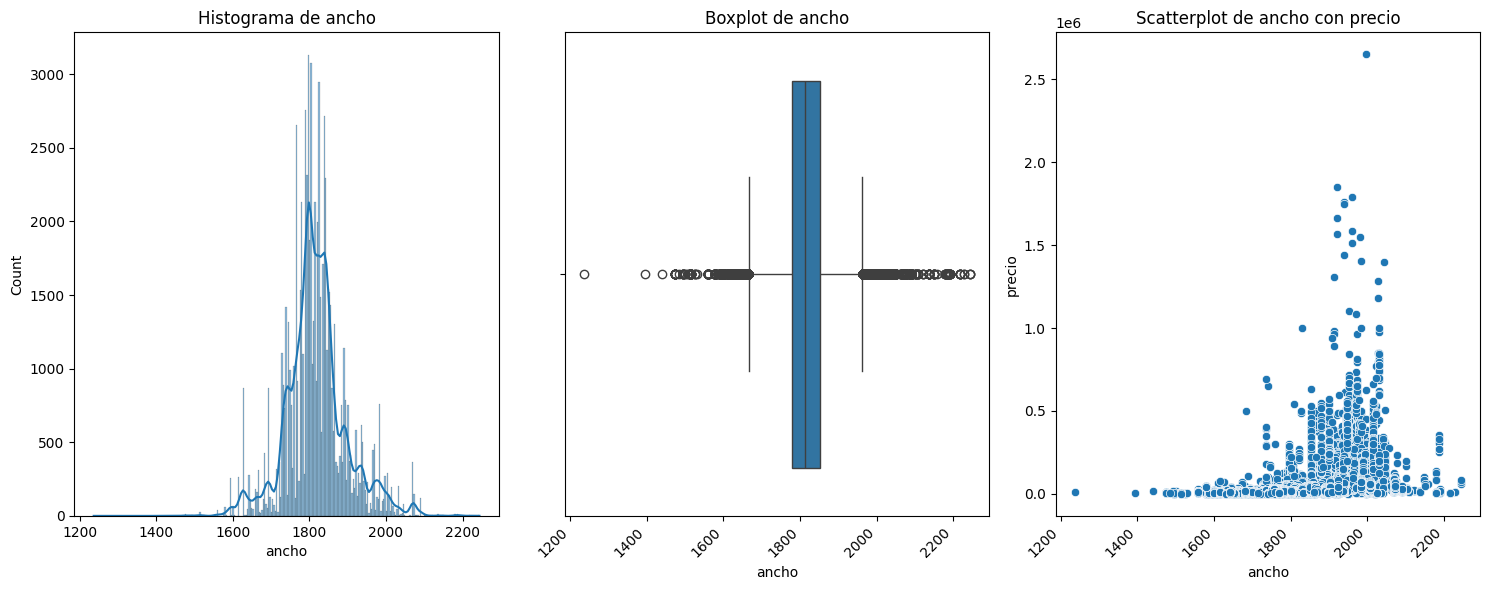

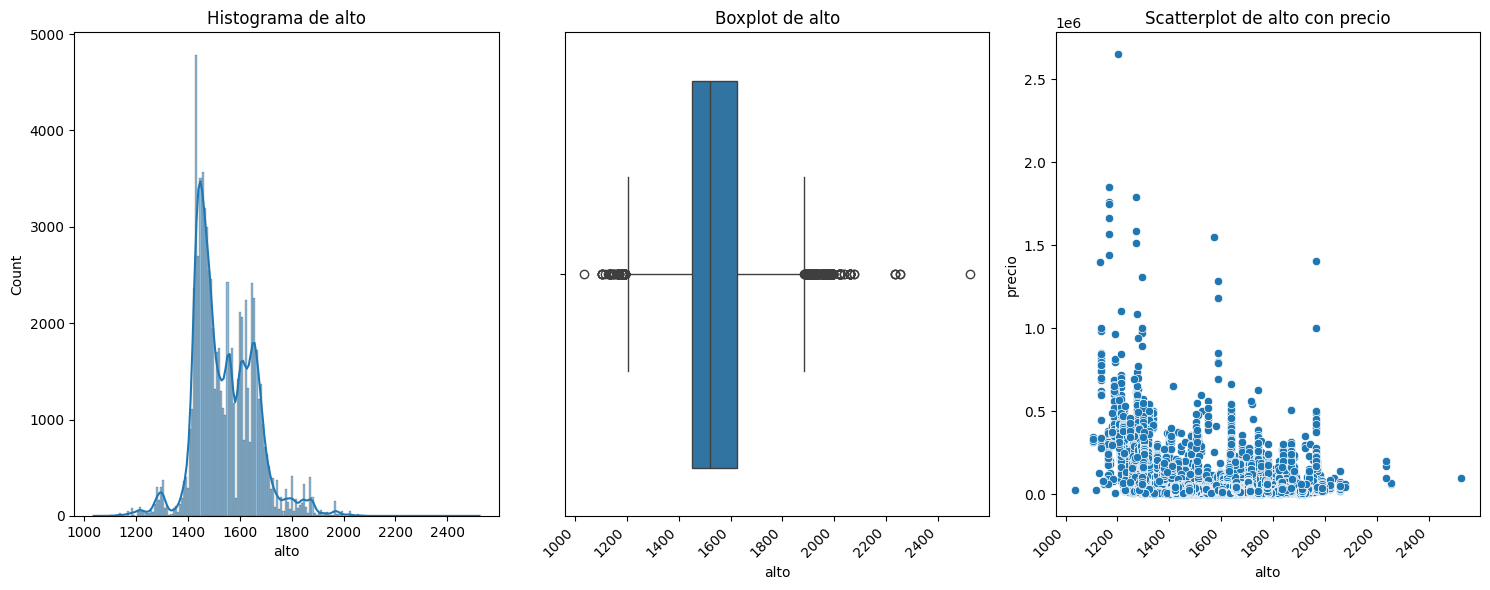

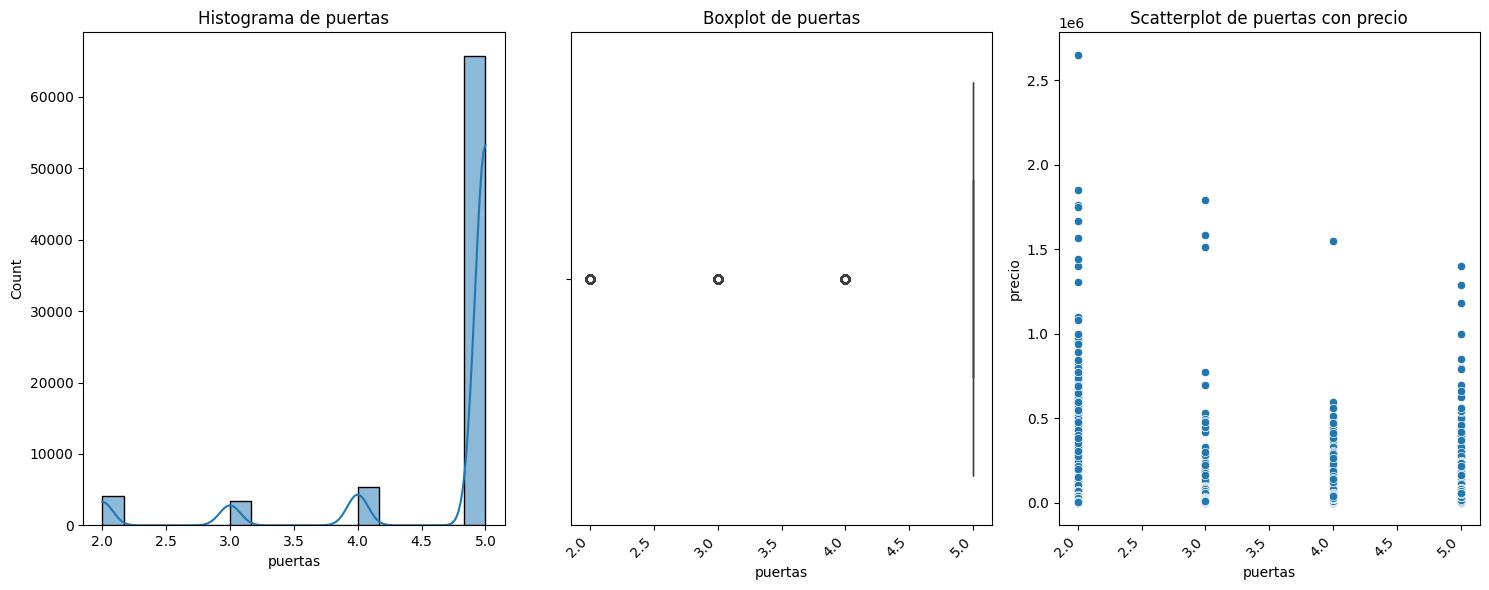

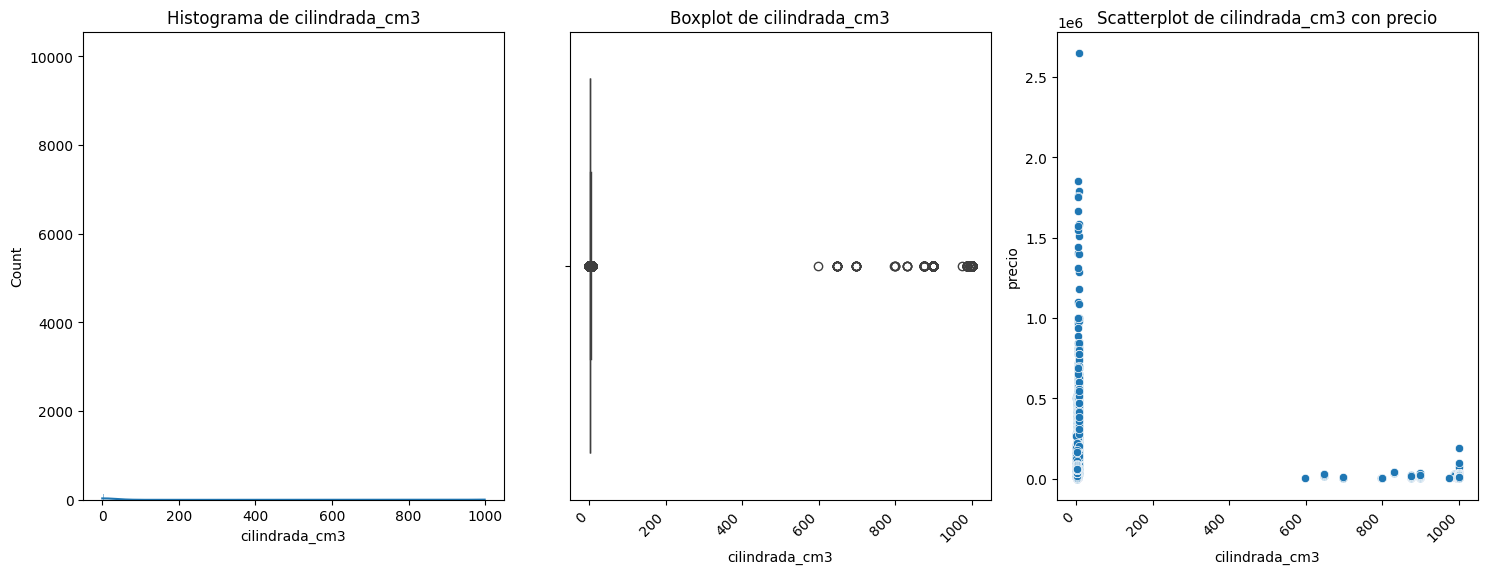

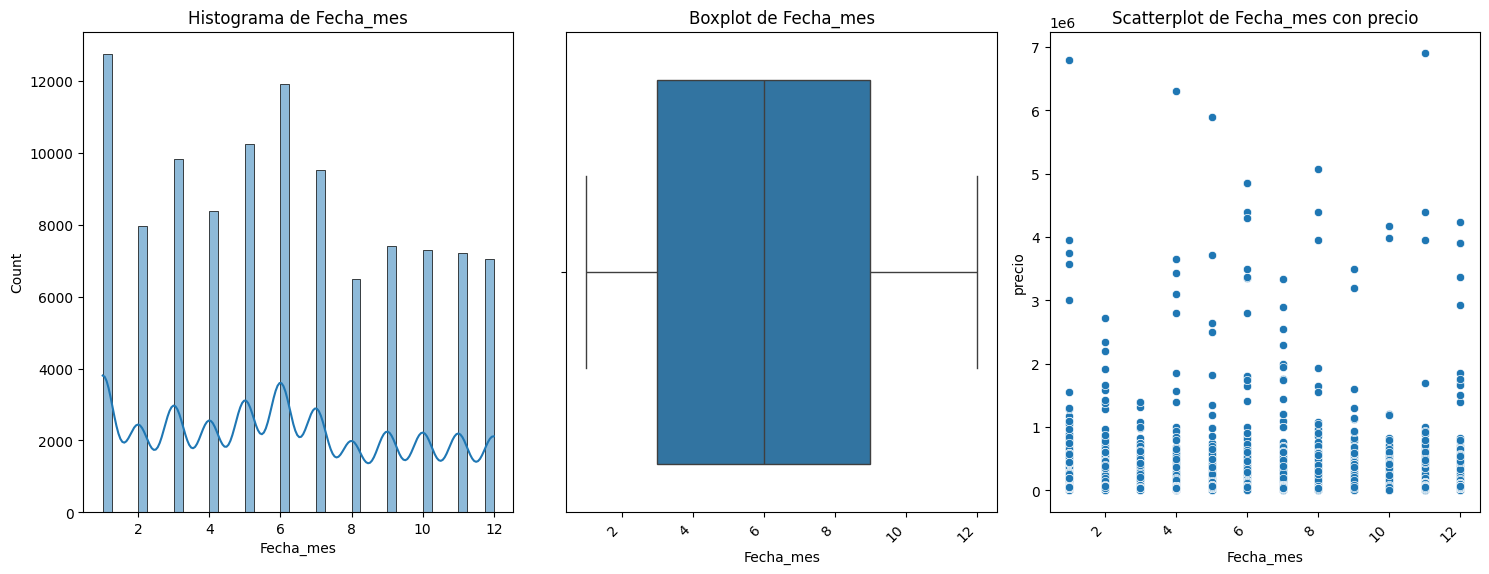

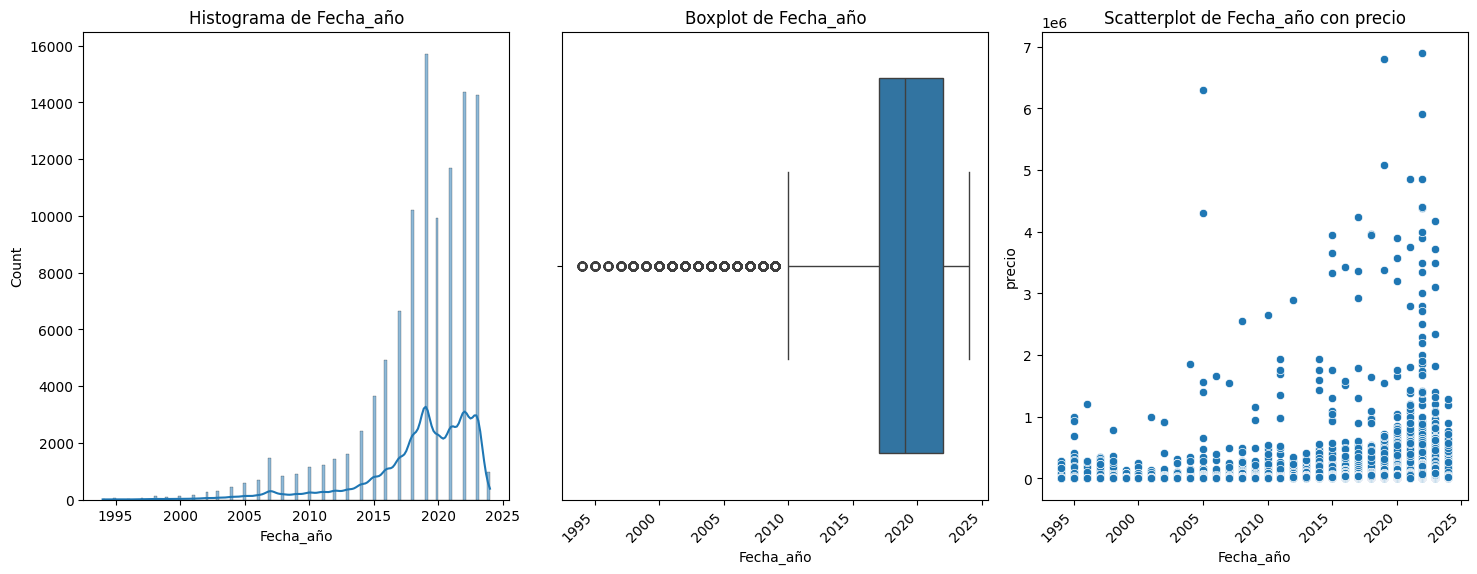

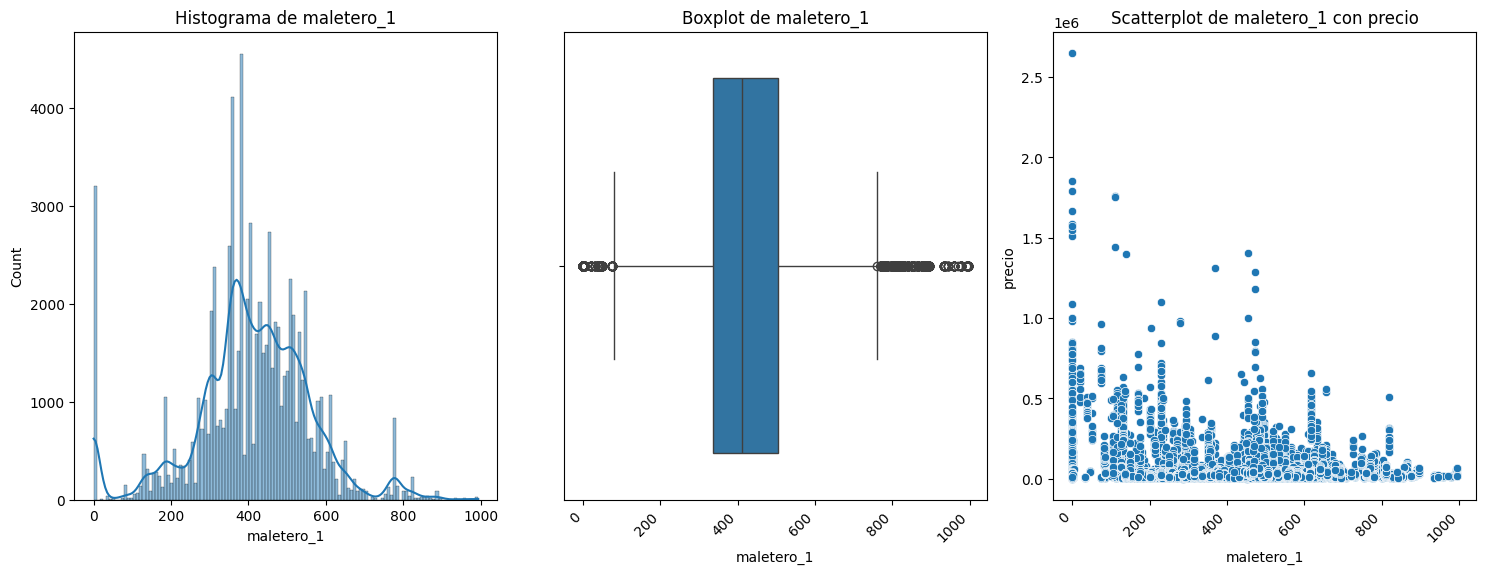

In [37]:
for columna in continuous_columns:
    metricas(df, columna)

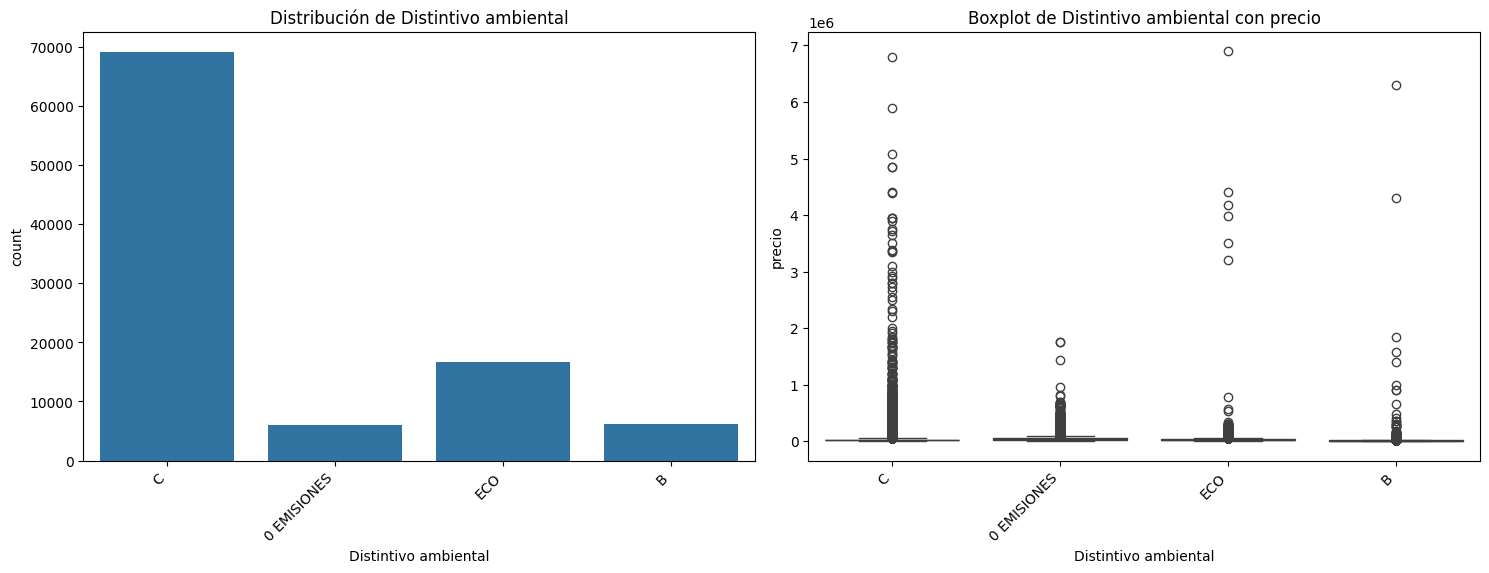

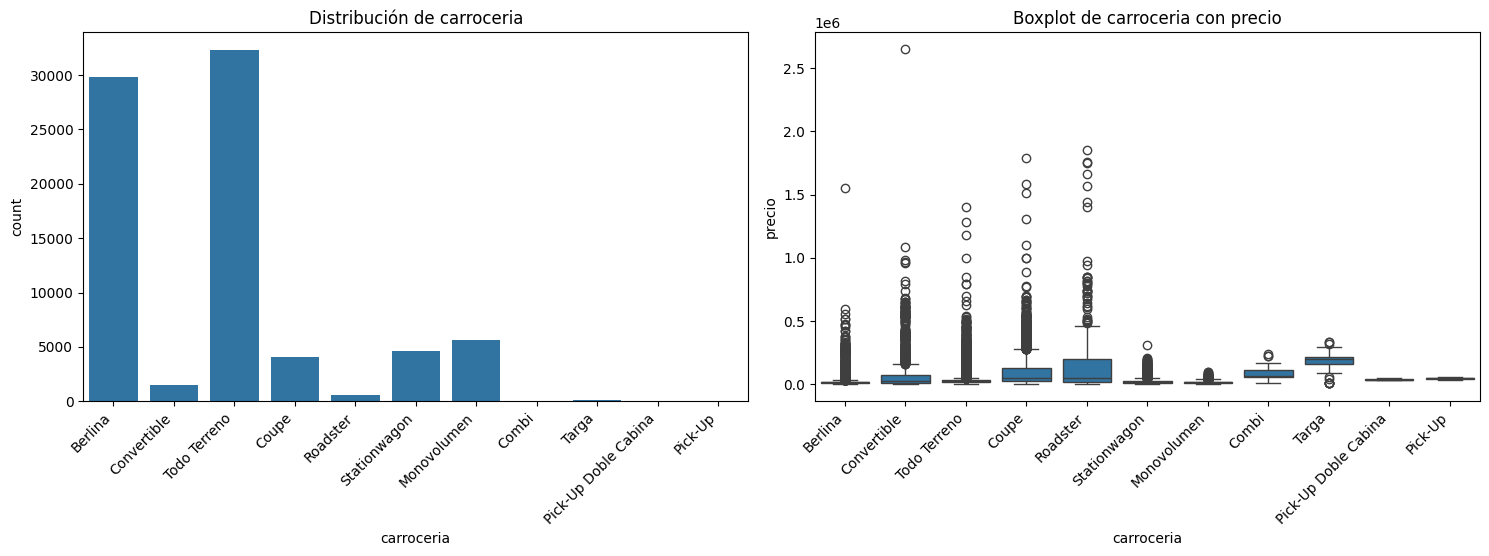

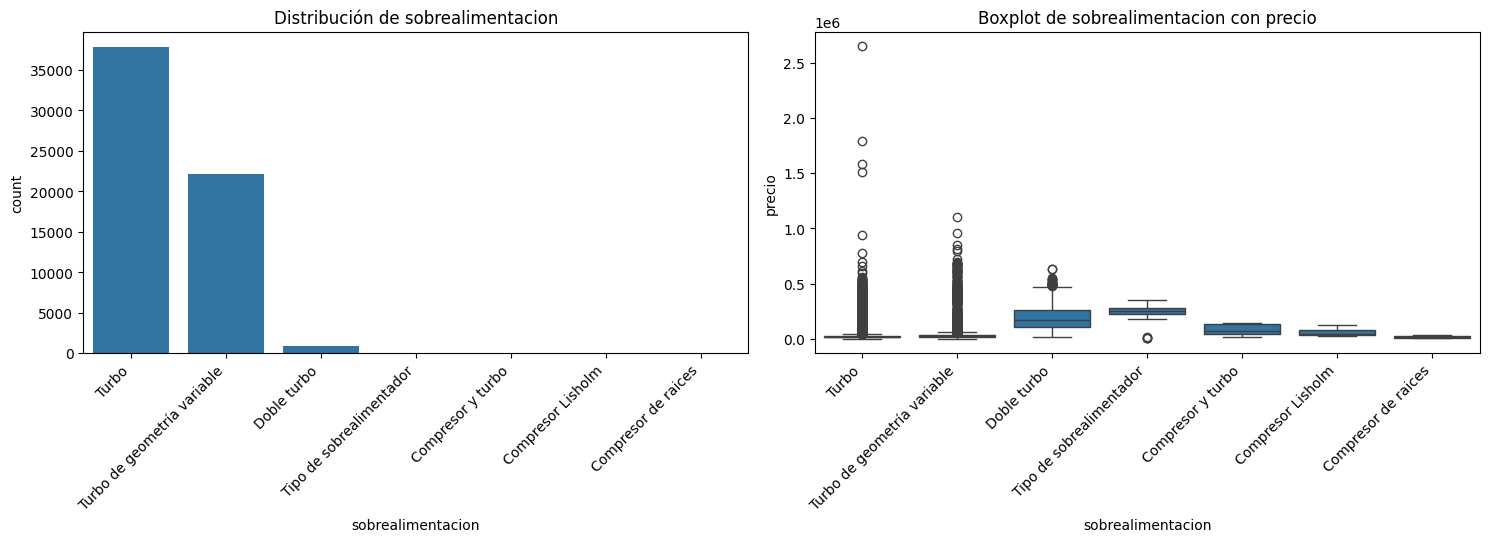

In [38]:
for columna in categorical_columns:
    metricas(df, columna)

In [39]:
df.columns

Index(['Kilómetros', 'Cambio', 'Potencia (cv)', 'Garantía',
       'Distintivo ambiental', 'largo', 'ancho', 'alto', 'batalla_mm',
       'peso_masa_kg', 'carroceria', 'puertas', 'plazas', 'combustible',
       'cilindrada_cm3', 'cilindros', 'sobrealimentacion', 'urbano',
       'carretera', 'medio', 'co2', 'deposito', 'precio', 'Fecha_mes',
       'Fecha_año', 'maletero_1', 'maletero_2'],
      dtype='object')

-98718.75 262575.0
98.53201007480922


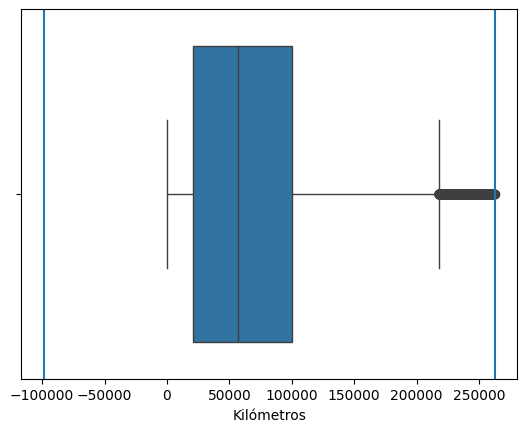

In [40]:


q1 = df["Kilómetros"].quantile(q = 0.25)
q3 = df["Kilómetros"].quantile(q = 0.75)
#k = 7
ric = q3 - q1

lim_l = q1 - 1.5*ric
lim_r = q3 + 2*ric

print(lim_l, lim_r)

print(df[df["Kilómetros"].between(lim_l, lim_r) | df["Kilómetros"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["Kilómetros"].isna()) | ((df["Kilómetros"] >= lim_l) & (df["Kilómetros"] <= lim_r))]


sns.boxplot(x = df["Kilómetros"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()


694.0
99.43247934987886


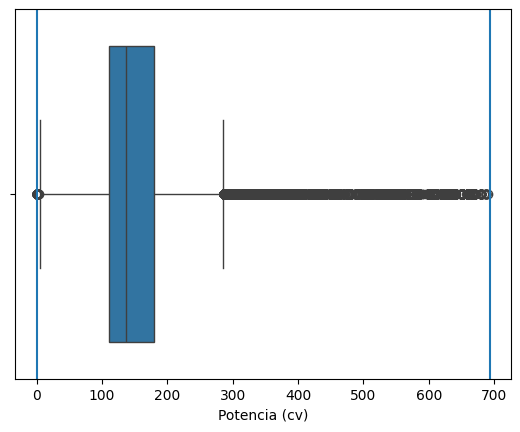

In [41]:

q1 = df["Potencia (cv)"].quantile(q = 0.25)
q3 = df["Potencia (cv)"].quantile(q = 0.75)
#k = 7
ric = q3 - q1

lim_l = q1 - 1.5*ric
lim_r = q3 + 7*ric

print(lim_r)

print(df[df["Potencia (cv)"].between(lim_l, lim_r) | df["Potencia (cv)"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["Potencia (cv)"].isna()) | (df["Potencia (cv)"] <= lim_r)]


sns.boxplot(x = df["Potencia (cv)"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()


In [42]:
z=3
mean = df["Garantía"].mean()
std = df["Garantía"].std()
    
lim_l = mean - z*std
lim_r = mean + z*std
    
df = df[df["Garantía"].between(lim_l, lim_r) | df["Garantía"].isna()]
porcentaje = df.shape[0] / df.shape[0] * 100
print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {"Garantía"} después de eliminar los outliers.')

Se mantienen el 100.00% de los datos en la columna Garantía después de eliminar los outliers.


3182.5 5636.5
99.80430152913414


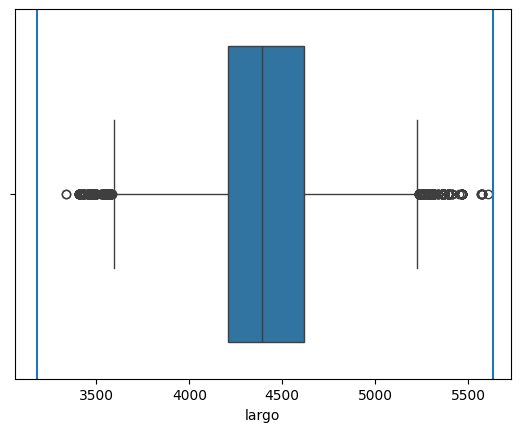

In [43]:

q1 = df["largo"].quantile(q = 0.25)
q3 = df["largo"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["largo"].between(lim_l, lim_r) | df["largo"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["largo"].isna()) | ((df["largo"] >= lim_l) & (df["largo"] <= lim_r))]


sns.boxplot(x = df["largo"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()


1556.0 2074.0
99.76354793440858


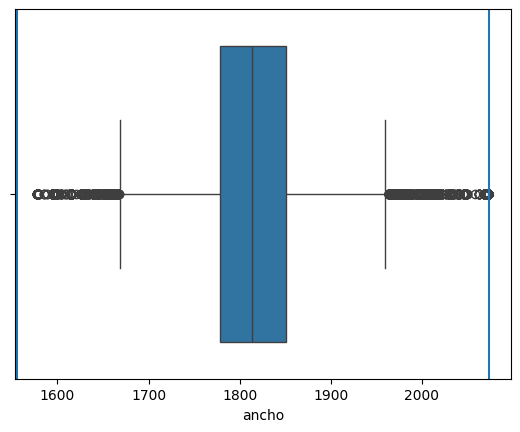

In [44]:
q1 = df["ancho"].quantile(q = 0.25)
q3 = df["ancho"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["ancho"].between(lim_l, lim_r) | df["ancho"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["ancho"].isna()) | ((df["ancho"] >= lim_l) & (df["ancho"] <= lim_r))]


sns.boxplot(x = df["ancho"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

1111.0 1966.0
99.7706952366271


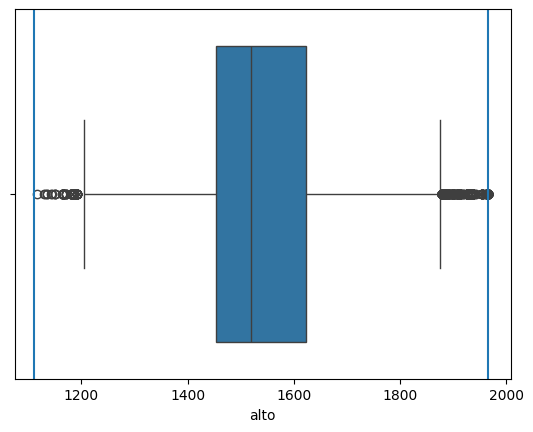

In [45]:
q1 = df["alto"].quantile(q = 0.25)
q3 = df["alto"].quantile(q = 0.75)
k = 2
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["alto"].between(lim_l, lim_r) | df["alto"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["alto"].isna()) | ((df["alto"] >= lim_l) & (df["alto"] <= lim_r))]


sns.boxplot(x = df["alto"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [46]:
q1 = df["batalla_mm"].quantile(q = 0.25)
q3 = df["batalla_mm"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["batalla_mm"].between(lim_l, lim_r) | df["batalla_mm"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["batalla_mm"].isna()) | ((df["batalla_mm"] >= lim_l) & (df["batalla_mm"] <= lim_r))]


sns.boxplot(x = df["batalla_mm"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

2142.0 3171.0
99.50653765185315


In [47]:
q1 = df["peso_masa_kg"].quantile(q = 0.25)
q3 = df["peso_masa_kg"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["peso_masa_kg"].between(lim_l, lim_r) | df["peso_masa_kg"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["peso_masa_kg"].isna()) | ((df["peso_masa_kg"] >= lim_l) & (df["peso_masa_kg"] <= lim_r))]


sns.boxplot(x = df["peso_masa_kg"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

757.5 3127.5
99.32358335840378


In [48]:
z=3
mean = df["puertas"].mean()
std = df["puertas"].std()
    
lim_l = mean - z*std
lim_r = mean + z*std
    
df = df[df["puertas"].between(lim_l, lim_r) | df["puertas"].isna()]
porcentaje = df.shape[0] / df.shape[0] * 100
print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {"plazas"} después de eliminar los outliers.')

Se mantienen el 100.00% de los datos en la columna plazas después de eliminar los outliers.


In [49]:
z=3
mean = df["plazas"].mean()
std = df["plazas"].std()
    
lim_l = mean - z*std
lim_r = mean + z*std
    
df = df[df["plazas"].between(lim_l, lim_r) | df["puertas"].isna()]
porcentaje = df.shape[0] / df.shape[0] * 100
print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {"plazas"} después de eliminar los outliers.')

Se mantienen el 100.00% de los datos en la columna plazas después de eliminar los outliers.


-16.25 22.75
99.97617098869675


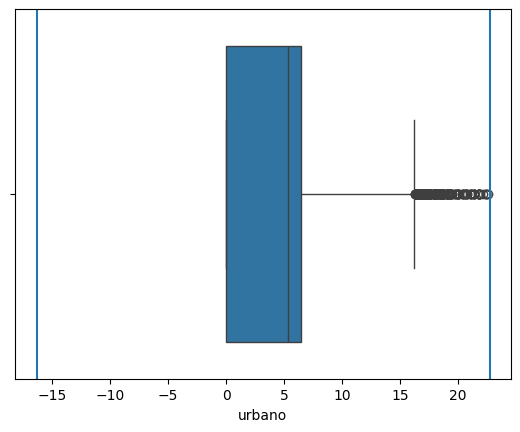

In [50]:
q1 = df["urbano"].quantile(q = 0.25)
q3 = df["urbano"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 2.5*ric

print(lim_l, lim_r)

print(df[df["urbano"].between(lim_l, lim_r) | df["urbano"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["urbano"].isna()) | (df["urbano"] <= lim_r)]


sns.boxplot(x = df["urbano"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [51]:
q1 = df["carretera"].quantile(q = 0.25)
q3 = df["carretera"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 1.5*ric

print(lim_l, lim_r)

print(df[df["carretera"].between(lim_l, lim_r) | df["carretera"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["carretera"].isna()) | (df["carretera"] <= lim_r)]


sns.boxplot(x = df["carretera"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

-11.75 11.75
99.98445563638624


-8.35 15.05
99.99689064394764


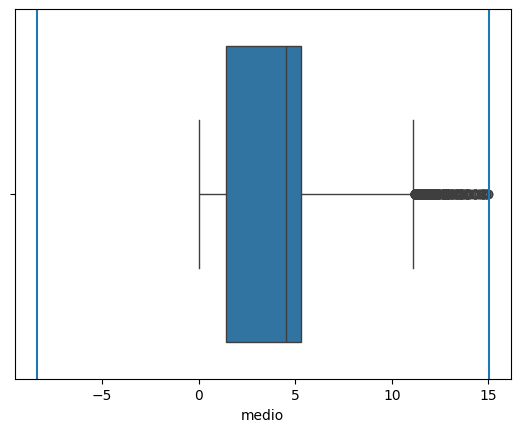

In [52]:
q1 = df["medio"].quantile(q = 0.25)
q3 = df["medio"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 2.5*ric

print(lim_l, lim_r)

print(df[df["medio"].between(lim_l, lim_r) | df["medio"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["medio"].isna()) | (df["medio"] <= lim_r)]


sns.boxplot(x = df["medio"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

-170.5 552.0
100.0


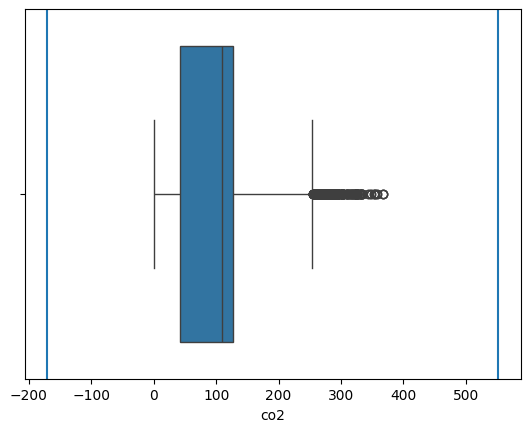

In [53]:
q1 = df["co2"].quantile(q = 0.25)
q3 = df["co2"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 5*ric

print(lim_l, lim_r)

print(df[df["co2"].between(lim_l, lim_r) | df["co2"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["co2"].isna()) | (df["co2"] <= lim_r)]


sns.boxplot(x = df["co2"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [54]:
q1 = df["deposito"].quantile(q = 0.25)
q3 = df["deposito"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["deposito"].between(lim_l, lim_r) | df["deposito"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["deposito"].isna()) | ((df["deposito"] >= lim_l) & (df["deposito"] <= lim_r))]


sns.boxplot(x = df["deposito"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

5.0 96.0
96.33499170812604


2002.0 2037.0
99.84506799793425


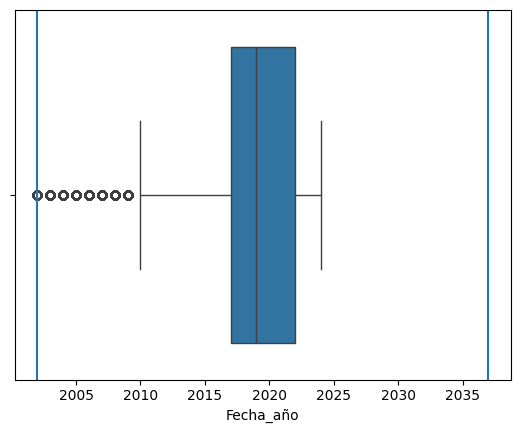

In [55]:
q1 = df["Fecha_año"].quantile(q = 0.25)
q3 = df["Fecha_año"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["Fecha_año"].between(lim_l, lim_r) | df["Fecha_año"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["Fecha_año"].isna()) | ((df["Fecha_año"] >= lim_l))]


sns.boxplot(x = df["Fecha_año"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

53.0 808.0
98.5021551724138


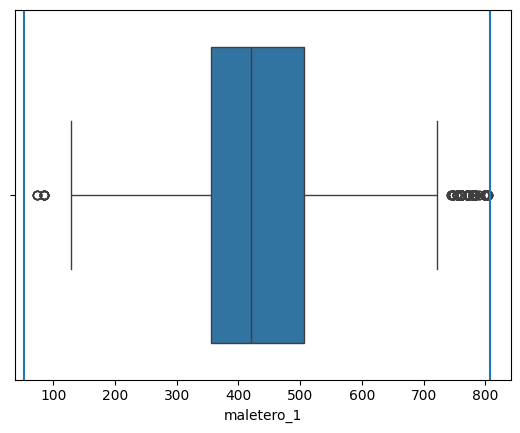

In [56]:
q1 = df["maletero_1"].quantile(q = 0.25)
q3 = df["maletero_1"].quantile(q = 0.75)
k = 2
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["maletero_1"].between(lim_l, lim_r) | df["maletero_1"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["maletero_1"].isna()) | ((df["maletero_1"] >= lim_l) & (df["maletero_1"] <= lim_r))]


sns.boxplot(x = df["maletero_1"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [57]:
df.shape 

#Motivo de preocupación, imagino

(91410, 27)

In [58]:
cambio_encoder = LabelEncoder()

df['Cambio'] = cambio_encoder.fit_transform(df['Cambio'].values)

In [59]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

for columna in categorical_columns:
    if columna != "Cambio":
        
        encoded = encoder.fit_transform(df[[columna]])
        
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([columna]), index=df.index)
        
        df = df.drop(columna, axis=1)
        df = pd.concat([df, encoded_df], axis=1)

In [60]:
df.columns

Index(['Kilómetros', 'Cambio', 'Potencia (cv)', 'Garantía', 'largo', 'ancho',
       'alto', 'batalla_mm', 'peso_masa_kg', 'puertas', 'plazas',
       'cilindrada_cm3', 'cilindros', 'urbano', 'carretera', 'medio', 'co2',
       'deposito', 'precio', 'Fecha_mes', 'Fecha_año', 'maletero_1',
       'maletero_2', 'Distintivo ambiental_B', 'Distintivo ambiental_C',
       'Distintivo ambiental_ECO', 'Distintivo ambiental_nan',
       'carroceria_Combi', 'carroceria_Convertible', 'carroceria_Coupe',
       'carroceria_Monovolumen', 'carroceria_Roadster',
       'carroceria_Stationwagon', 'carroceria_Todo Terreno', 'carroceria_nan',
       'combustible_Diesel', 'combustible_Diesel y corriente eléctrica',
       'combustible_Gasolina', 'combustible_Gasolina y corriente eléctrica',
       'combustible_Gasolina/gas', 'combustible_Mixto Gasolina/Etanol',
       'combustible_nan', 'sobrealimentacion_Compresor de raices',
       'sobrealimentacion_Doble turbo',
       'sobrealimentacion_Tipo de sob

In [61]:
categorical_columns = df.columns.difference(continuous_columns)

In [62]:
print(df.isna().sum())

Kilómetros                                           0
Cambio                                               0
Potencia (cv)                                     1986
Garantía                                          7959
largo                                            27309
ancho                                            27309
alto                                             27323
batalla_mm                                       27309
peso_masa_kg                                     27309
puertas                                          27309
plazas                                           27309
cilindrada_cm3                                   27309
cilindros                                        27313
urbano                                           27309
carretera                                        27309
medio                                            27309
co2                                              27309
deposito                                         27309
precio    

In [63]:
columnas_imputer = columnas_imputer = ['Potencia (cv)', 'Garantía', 'largo', 'ancho', 'alto','batalla_mm', 'peso_masa_kg', 'puertas', 'plazas', 'cilindrada_cm3','cilindros', 'urbano', 'carretera', 'medio', 'co2', 'deposito', 'precio', 'Fecha_mes', 'maletero_1', 'maletero_2']


imputer = KNNImputer(n_neighbors=10)

imputer.set_output(transform="pandas")

df[columnas_imputer] = imputer.fit_transform(df[columnas_imputer])

In [64]:
print(df.isna().sum())

Kilómetros                                       0
Cambio                                           0
Potencia (cv)                                    0
Garantía                                         0
largo                                            0
ancho                                            0
alto                                             0
batalla_mm                                       0
peso_masa_kg                                     0
puertas                                          0
plazas                                           0
cilindrada_cm3                                   0
cilindros                                        0
urbano                                           0
carretera                                        0
medio                                            0
co2                                              0
deposito                                         0
precio                                           0
Fecha_mes                      

In [65]:
correlation_matrix = df.corr()

plt.figure(figsize=(25, 15))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Mapa de Calor de Correlaciones')
plt.show()

precio                                           1.000000
Potencia (cv)                                    0.311142
cilindros                                        0.298632
deposito                                         0.231726
peso_masa_kg                                     0.227297
ancho                                            0.224765
batalla_mm                                       0.216091
largo                                            0.211286
maletero_1                                       0.138892
urbano                                           0.112791
alto                                             0.110754
medio                                            0.104406
carroceria_nan                                   0.099195
combustible_nan                                  0.099195
co2                                              0.096554
Fecha_año                                        0.083170
carretera                                        0.076341
sobrealimentac

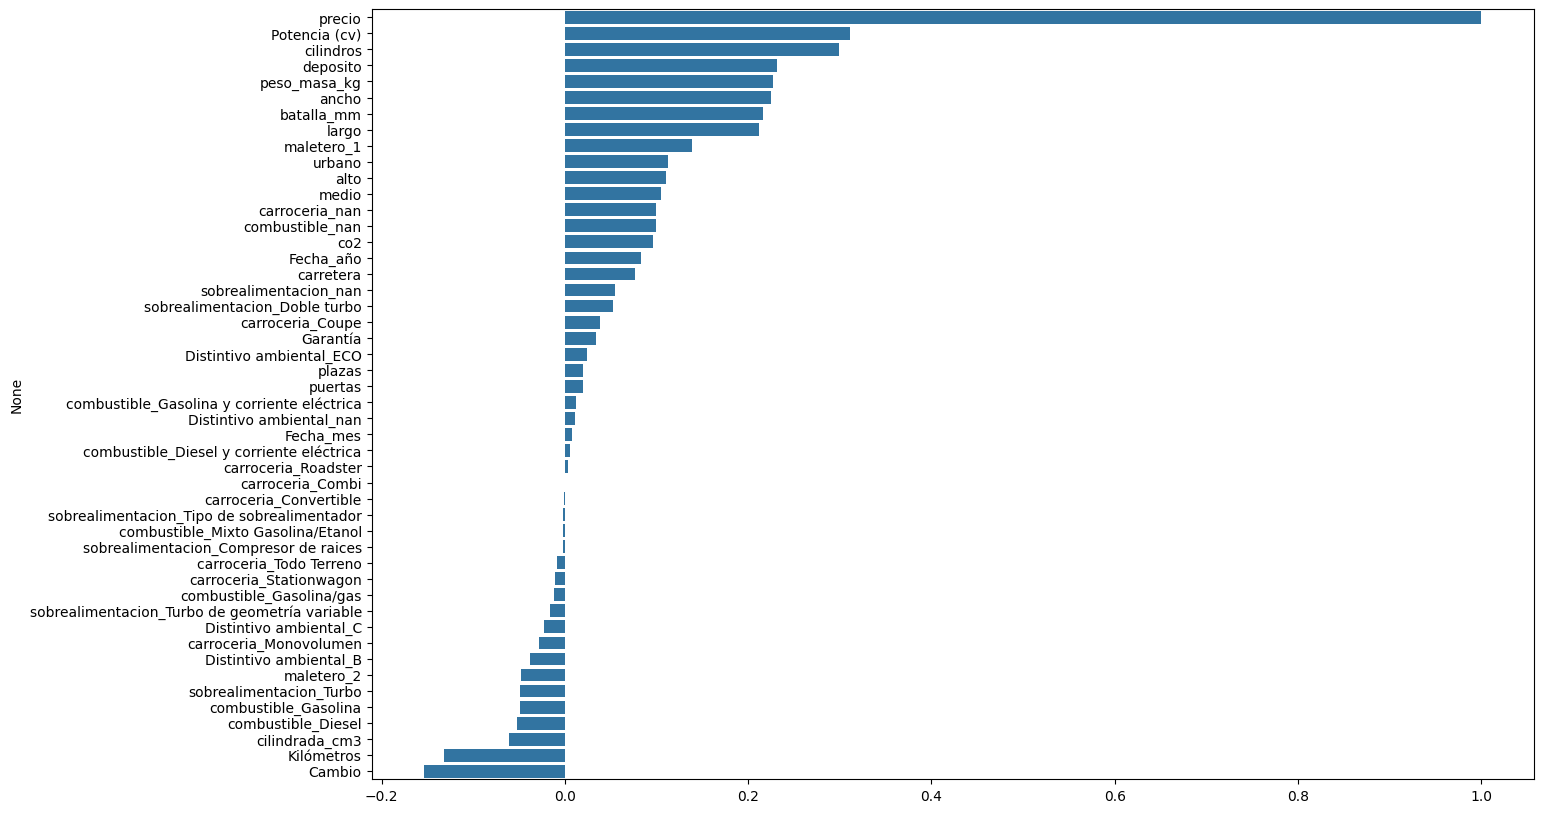

In [66]:
correlations = df.corr()['precio'].sort_values(ascending=False)

print(correlations)

plt.figure(figsize=(15, 10))
sns.barplot(x=correlations.values, y=correlations.index)
plt.show()

In [67]:
print(df.isna().sum())

Kilómetros                                       0
Cambio                                           0
Potencia (cv)                                    0
Garantía                                         0
largo                                            0
ancho                                            0
alto                                             0
batalla_mm                                       0
peso_masa_kg                                     0
puertas                                          0
plazas                                           0
cilindrada_cm3                                   0
cilindros                                        0
urbano                                           0
carretera                                        0
medio                                            0
co2                                              0
deposito                                         0
precio                                           0
Fecha_mes                      

In [68]:
df = df.dropna(subset=['precio'])

In [69]:
print(df.isna().sum())

Kilómetros                                       0
Cambio                                           0
Potencia (cv)                                    0
Garantía                                         0
largo                                            0
ancho                                            0
alto                                             0
batalla_mm                                       0
peso_masa_kg                                     0
puertas                                          0
plazas                                           0
cilindrada_cm3                                   0
cilindros                                        0
urbano                                           0
carretera                                        0
medio                                            0
co2                                              0
deposito                                         0
precio                                           0
Fecha_mes                      

In [70]:
print(df['precio'].isna().sum())

0


In [71]:
X = df.drop("precio", axis = 1)
y = df["precio"]

print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (91410, 47)
y: (91410,)


Feature Importance:
 1. feature  0 ( 0.24646388251760662): cilindrada_cm3
 2. feature  1 ( 0.21616450661034503): cilindros
 3. feature  2 ( 0.20904984278232566): Potencia (cv)
 4. feature  3 ( 0.06566913234644502): Kilómetros
 5. feature  4 ( 0.06470679296337083): Fecha_año
 6. feature  5 ( 0.05366276634929978): Distintivo ambiental_ECO
 7. feature  6 ( 0.04358754316592236): Garantía
 8. feature  7 (0.024210984323572625): Fecha_mes
 9. feature  8 (0.007403339821881787): carretera
10. feature  9 (0.007337782880386347): Distintivo ambiental_B
11. feature 10 (0.0072257069120106945): maletero_1
12. feature 11 (0.007138616811337882): ancho
13. feature 12 (0.007128337187052946): peso_masa_kg
14. feature 13 ( 0.00640162100242958): largo
15. feature 14 (0.005224228593478882): alto
16. feature 15 (0.004155254969890869): co2
17. feature 16 (0.0040688525716710425): batalla_mm
18. feature 17 (0.003543708833794899): Distintivo ambiental_nan
19. feature 18 (0.0031364439839203086): medio
20. feature 

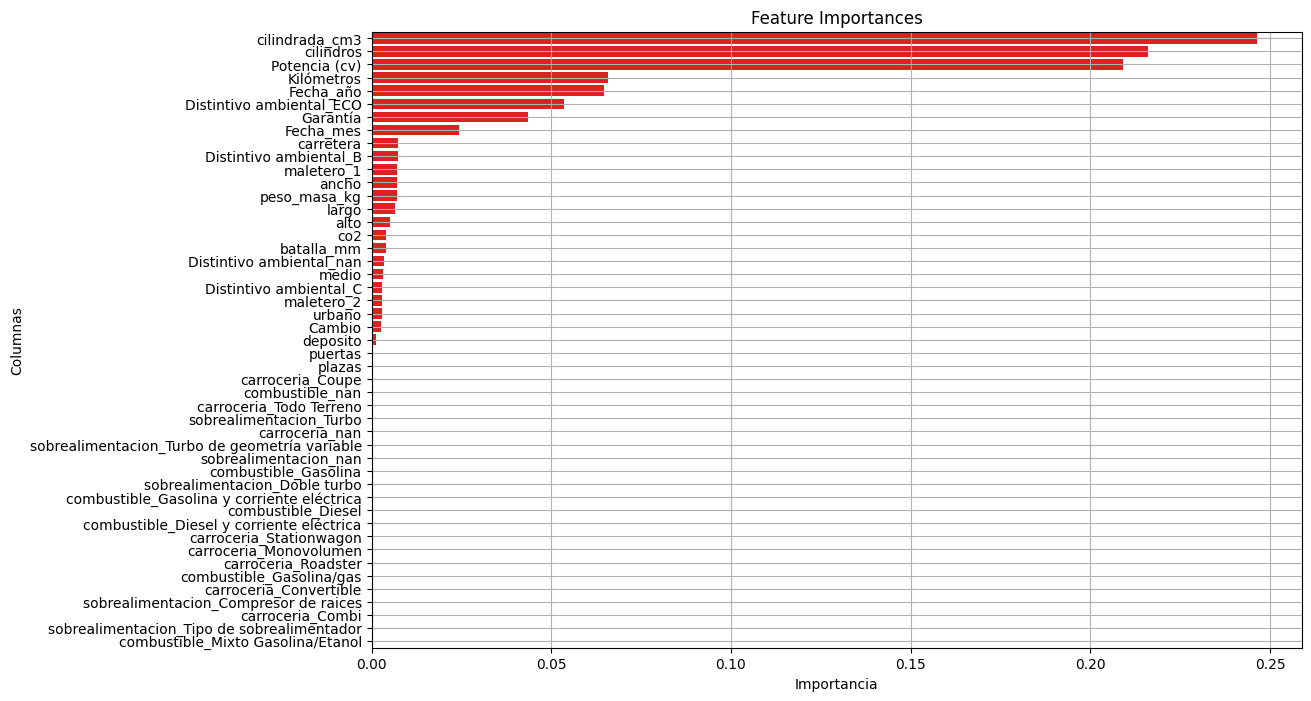

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Modelo de RandomForest para obtener Feature Importance
model = RandomForestRegressor(n_estimators = 250,
                               random_state = 0)
# Entrenamos el modelo
model.fit(X, y)

# Calculamos Feature Importance
importances = model.feature_importances_

df_importances = pd.DataFrame(data = zip(X.columns, importances),
                              columns = ["Columnas", "Importancia"])

df_importances = df_importances.sort_values("Importancia", ascending = False)

print("Feature Importance:")

for index, (feature, importance) in enumerate(df_importances.values):
    
    print(f"{index + 1:2}. feature {index:2} ({importance:20}): {feature}")

plt.figure(figsize = (12, 8))

plt.title("Feature Importances")
sns.barplot(x = df_importances["Importancia"], y = df_importances["Columnas"], color = "red")

plt.grid()
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("autocasion.csv")

df.head()

C:\Users\34629\AppData\Local\Temp\ipykernel_25916\3587508825.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("autocasion.csv")


Fecha de matriculación Kilómetros      Cambio Potencia (cv)  Garantía  \
0                02/2023   3.900 km      Manual           179  12 meses   
1                06/2023   4.000 km      Manual           180  24 meses   
2                09/2023       1 km  Automático           154  36 meses   
3                10/2023       7 km  Automático           154  36 meses   
4                08/2023      10 km  Automático           154  36 meses   

                                               Color Distintivo ambiental  \
0                                              Negro                    C   
1                                               Gris                    C   
2  Azul Poisson (metalizado)\n                   ...          0 EMISIONES   
3                                     PUNKN METALLIC          0 EMISIONES   
4                                              Verde          0 EMISIONES   

     largo    ancho     alto  ...          combustible cilindrada_cm3  \
0      NaN      NaN      NaN  ...                  NaN            NaN   
1      NaN      NaN      NaN  ...                  NaN            NaN   
2  3673 mm  1682 mm  1518 mm  ...  Corriente eléctrica            0.0   
3  3673 mm  1682 mm  1518 mm  ...  Corriente eléctrica            0.0   
4  3673 mm  1682 mm  1518 mm  ...  Corriente eléctrica            0.0   

   cilindros sobrealimentacion urbano  carretera medio  co2  deposito  \
0        NaN               NaN    NaN        NaN   NaN  NaN       NaN   
1        NaN               NaN    NaN        NaN   NaN  NaN       NaN   
2        NaN             Turbo   0,00       0,00  0,00    -      0,00   
3        NaN             Turbo   0,00       0,00  0,00    -      0,00   
4        NaN             Turbo   0,00       0,00  0,00    -      0,00   

     precio  
0  29.000 €  
1  30.500 €  
2  43.800 €  
3  38.990 €  
4  35.990 €  

[5 rows x 26 columns]

In [4]:
df.shape

(106431, 26)

In [5]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

Fecha de matriculación     0.025369
Kilómetros                 0.025369
Cambio                     0.062952
Potencia (cv)              0.025369
Garantía                   5.504975
Color                      0.025369
Distintivo ambiental       7.888679
largo                     26.196315
ancho                     26.196315
alto                      26.196315
batalla_mm                26.196315
maletero_l                26.196315
peso_masa_kg              26.196315
carroceria                26.196315
puertas                   26.196315
plazas                    26.196315
combustible               26.196315
cilindrada_cm3            26.196315
cilindros                 28.478545
sobrealimentacion         26.196315
urbano                    26.196315
carretera                 26.196315
medio                     26.196315
co2                       26.196315
deposito                  26.196315
precio                     0.025369
dtype: float64


In [6]:
df = df.dropna(subset=['precio'])

In [7]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

Fecha de matriculación     0.000000
Kilómetros                 0.000000
Cambio                     0.037593
Potencia (cv)              0.000000
Garantía                   5.480997
Color                      0.000000
Distintivo ambiental       7.865306
largo                     26.177587
ancho                     26.177587
alto                      26.177587
batalla_mm                26.177587
maletero_l                26.177587
peso_masa_kg              26.177587
carroceria                26.177587
puertas                   26.177587
plazas                    26.177587
combustible               26.177587
cilindrada_cm3            26.177587
cilindros                 28.460396
sobrealimentacion         26.177587
urbano                    26.177587
carretera                 26.177587
medio                     26.177587
co2                       26.177587
deposito                  26.177587
precio                     0.000000
dtype: float64


In [8]:
df.shape

(106404, 26)

In [9]:
df["Fecha_mes"] = np.nan

df["Fecha_año"] = df['Fecha de matriculación']

filas_con_mes = df['Fecha de matriculación'].str.contains('/')

df.loc[filas_con_mes, "Fecha_mes"] = df.loc[filas_con_mes, 'Fecha de matriculación'].str.split('/').str[0].astype("Int64")
df.loc[filas_con_mes, "Fecha_año"] = df.loc[filas_con_mes, 'Fecha de matriculación'].str.split('/').str[1].astype("Int64")

In [10]:
#df = df.drop(columns=['Fecha de matriculación'])

In [11]:
#La columna del año me sale tipo objeto y luego la trata como categórica
#La vuelvo a cambiar con errors="coerce" para asegurarme de que se convierte a entero

df['Fecha_año'] = pd.to_numeric(df['Fecha_año'], errors="coerce")

df['Fecha_año'].dtype

dtype('int64')

In [12]:
df.shape

(106404, 27)

In [13]:
df["Kilómetros"] = df["Kilómetros"].str.split(' ').str[0].str.replace(".","")

df["Kilómetros"] = df["Kilómetros"].astype(float)

In [14]:
df["Potencia (cv)"] = df["Potencia (cv)"].replace("-",np.nan).astype(float)


In [15]:
df["Garantía"] = df["Garantía"].str.split(' ').str[0].replace("Sí",np.nan).replace("No",0).astype(float)

In [16]:
df = df.drop(columns=['Color'])

In [17]:
df.shape

(106404, 26)

In [18]:
df["largo"] = df["largo"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [19]:
df["ancho"] = df["ancho"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [20]:
df["alto"] = df["alto"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [21]:
df.rename(columns={"maletero_l": "Maletero"}, inplace=True)    

df["maletero_1"]=df["Maletero"].str.split('/').str[0].astype(float)

df["maletero_2"]=df["Maletero"].str.split('/').str[1].astype(float)

In [22]:
df = df.drop(columns=['Maletero'])

In [23]:
df["puertas"] = df["puertas"].replace("-","").replace("", np.nan).astype(float)

In [24]:
df["sobrealimentacion"] = df["sobrealimentacion"].replace("-",np.nan)

In [25]:
df["urbano"] = df["urbano"].str.replace(",", ".").astype(float)

In [26]:
df["carretera"] = df["carretera"].str.replace(",", ".").astype(float)

In [27]:
df["medio"] = df["medio"].str.replace(",", ".").astype(float)

In [28]:
df["co2"] = df["co2"].replace("-", 0).astype(float)

In [29]:
df["deposito"] = df["deposito"].str.replace(",", ".").astype(float)

In [30]:
df["precio"] = df["precio"].str.split(' ').str[0].str.replace(".", "").replace("Consultar", np.nan).astype(float)

In [31]:
df.shape

(106404, 27)

In [32]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continuous_columns = df.select_dtypes(include=['Int64', 'float', 'int']).columns


def metricas (df, columna):
    
    if columna in categorical_columns:
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        sns.countplot(data=df, x=columna)
        plt.title(f'Distribución de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=columna, y='precio')
        plt.title(f'Boxplot de {columna} con precio')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()
    
    elif columna in continuous_columns:

        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 3, 1)
        sns.histplot(df[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        
        
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[columna])
        plt.title(f'Boxplot de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=df[columna], y=df['precio'])
        plt.title(f'Scatterplot de {columna} con precio')
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [33]:
categorical_columns

Index(['Cambio', 'Distintivo ambiental', 'carroceria', 'combustible',
       'sobrealimentacion'],
      dtype='object')

In [34]:
len(categorical_columns)

5

In [35]:
continuous_columns

Index(['Kilómetros', 'Potencia (cv)', 'Garantía', 'largo', 'ancho', 'alto',
       'batalla_mm', 'peso_masa_kg', 'puertas', 'plazas', 'cilindrada_cm3',
       'cilindros', 'urbano', 'carretera', 'medio', 'co2', 'deposito',
       'precio', 'Fecha_mes', 'Fecha_año', 'maletero_1', 'maletero_2'],
      dtype='object')

In [36]:
len(continuous_columns)

22

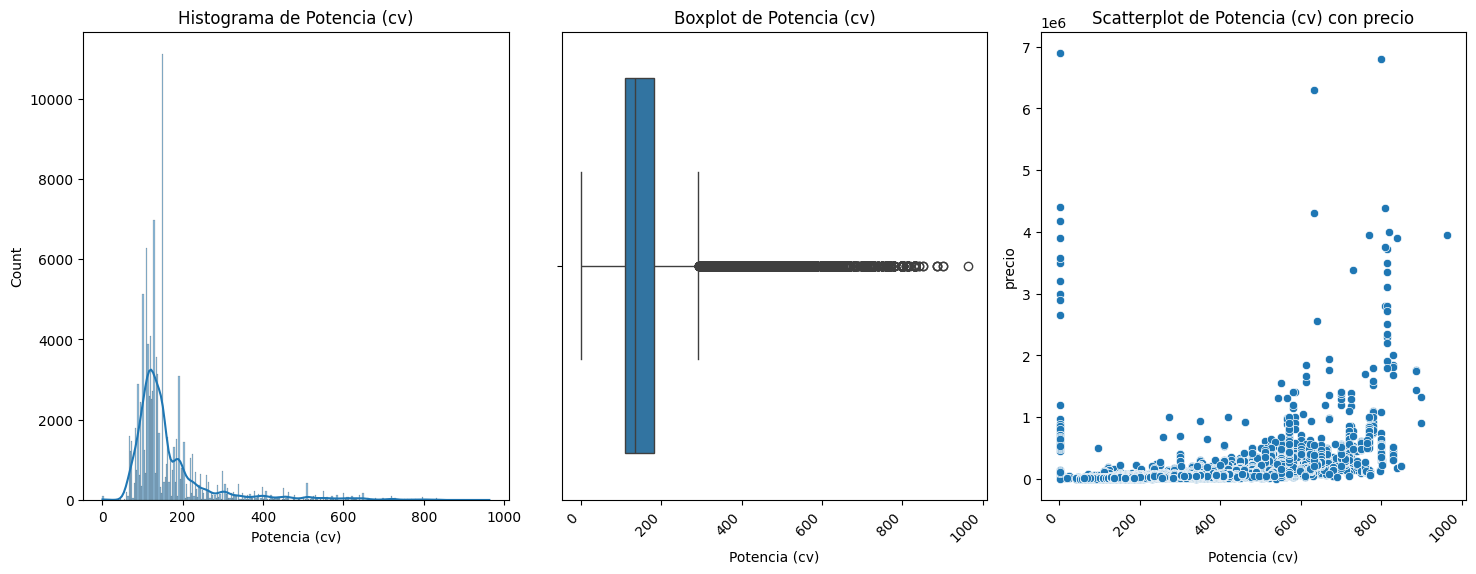

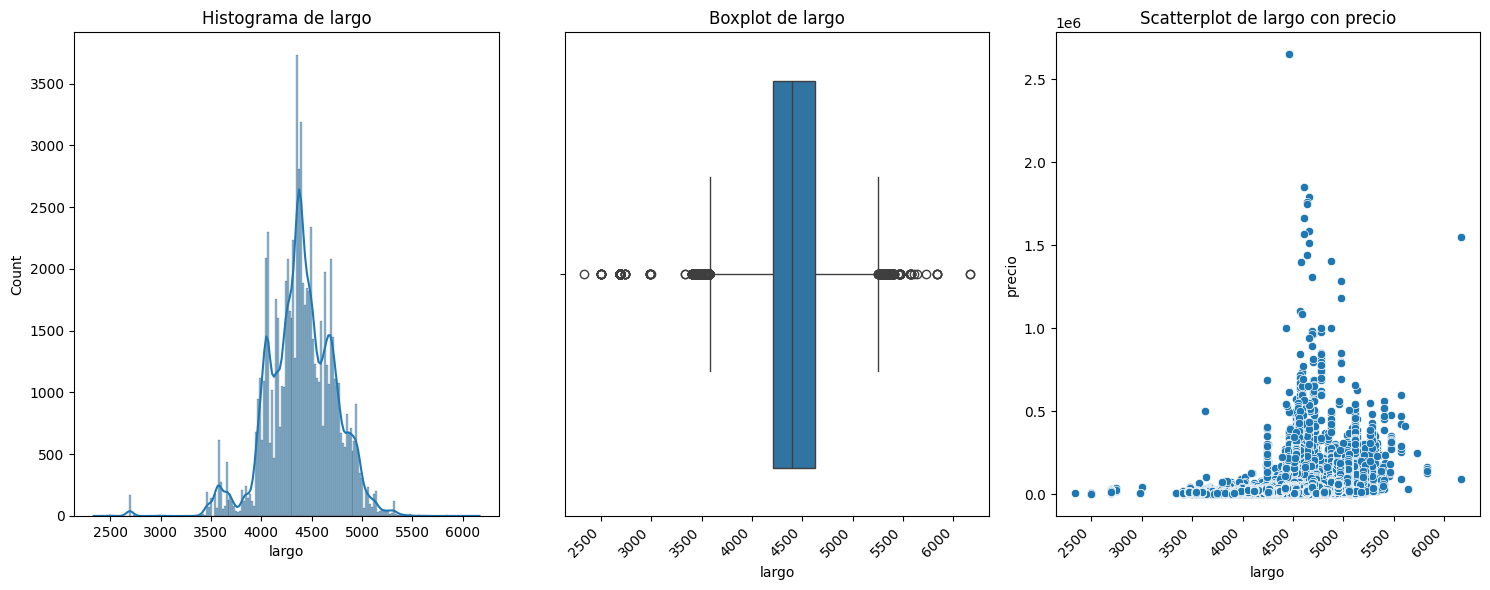

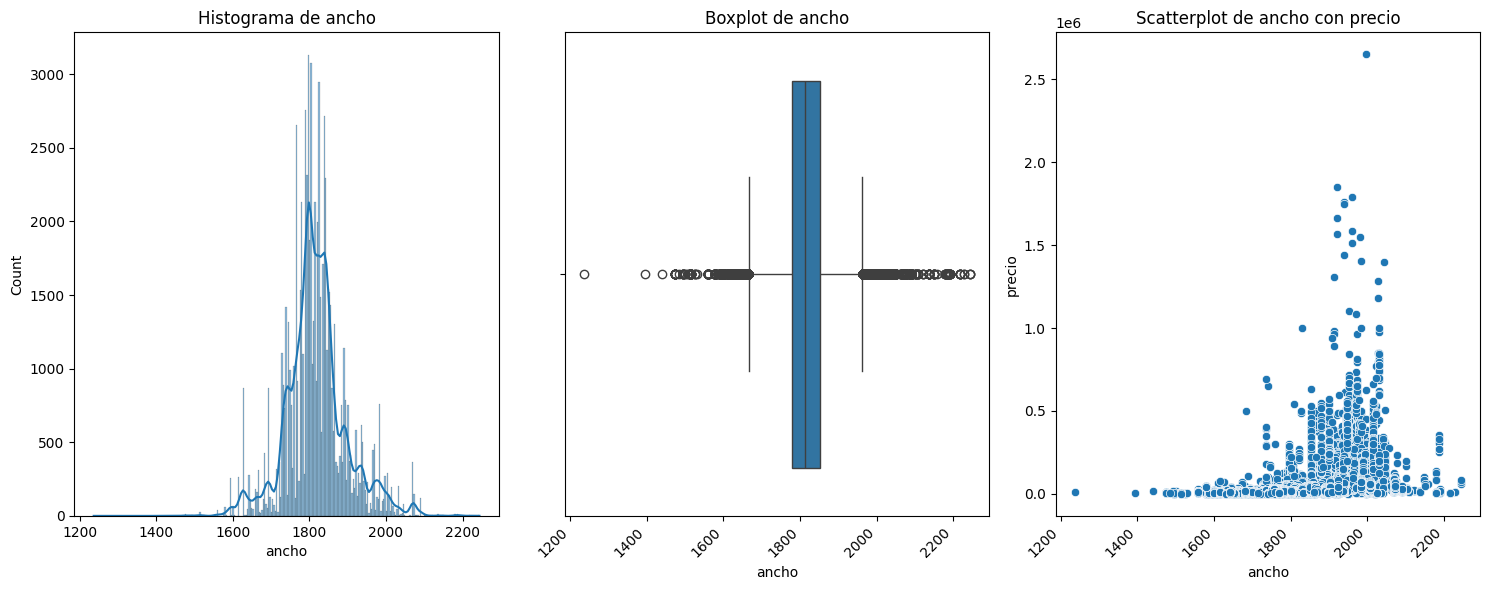

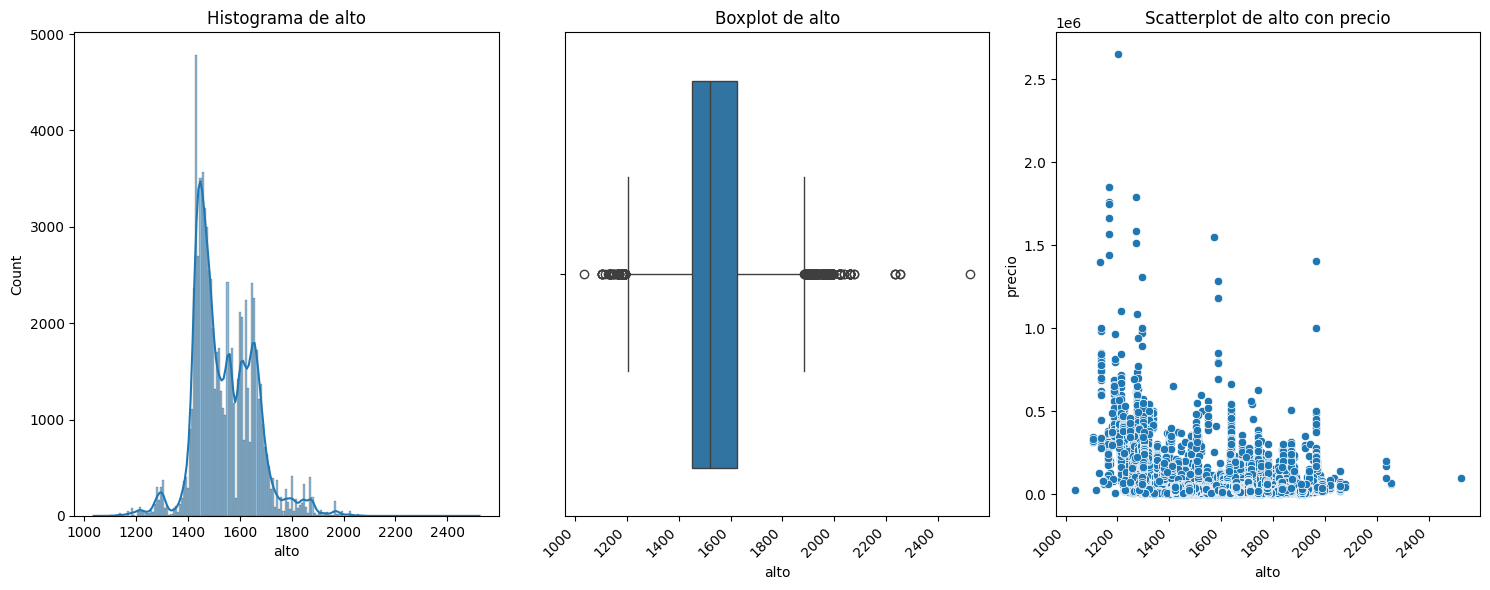

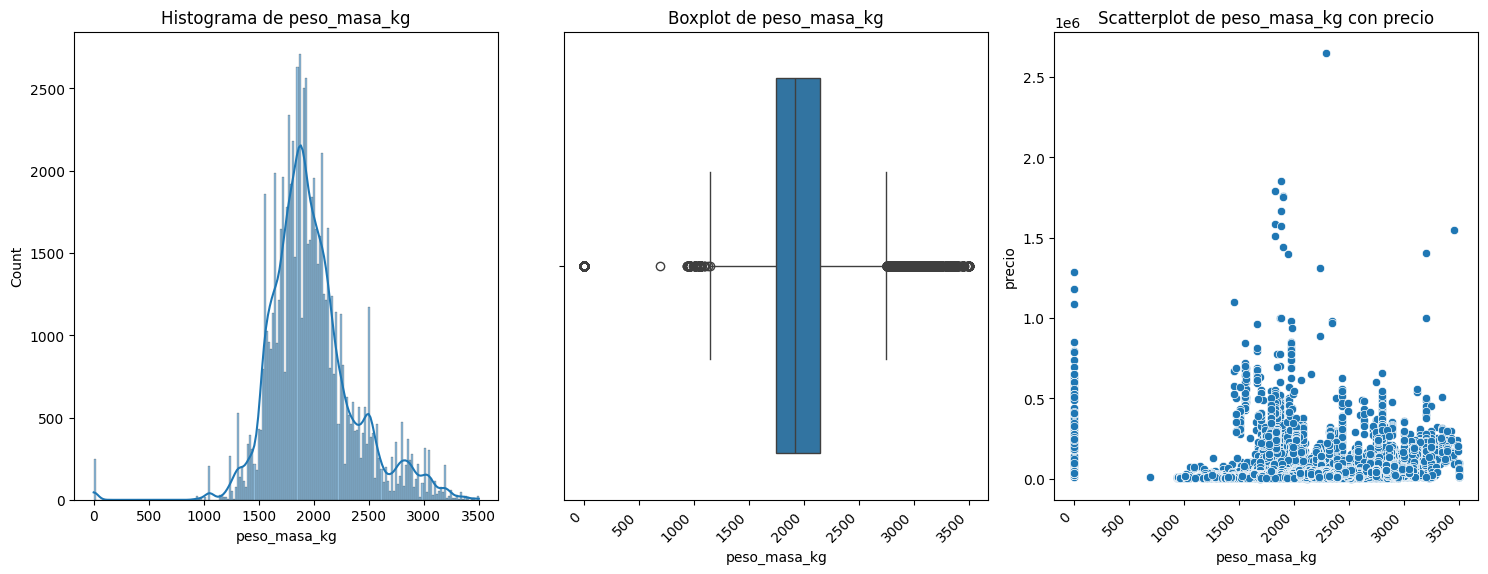

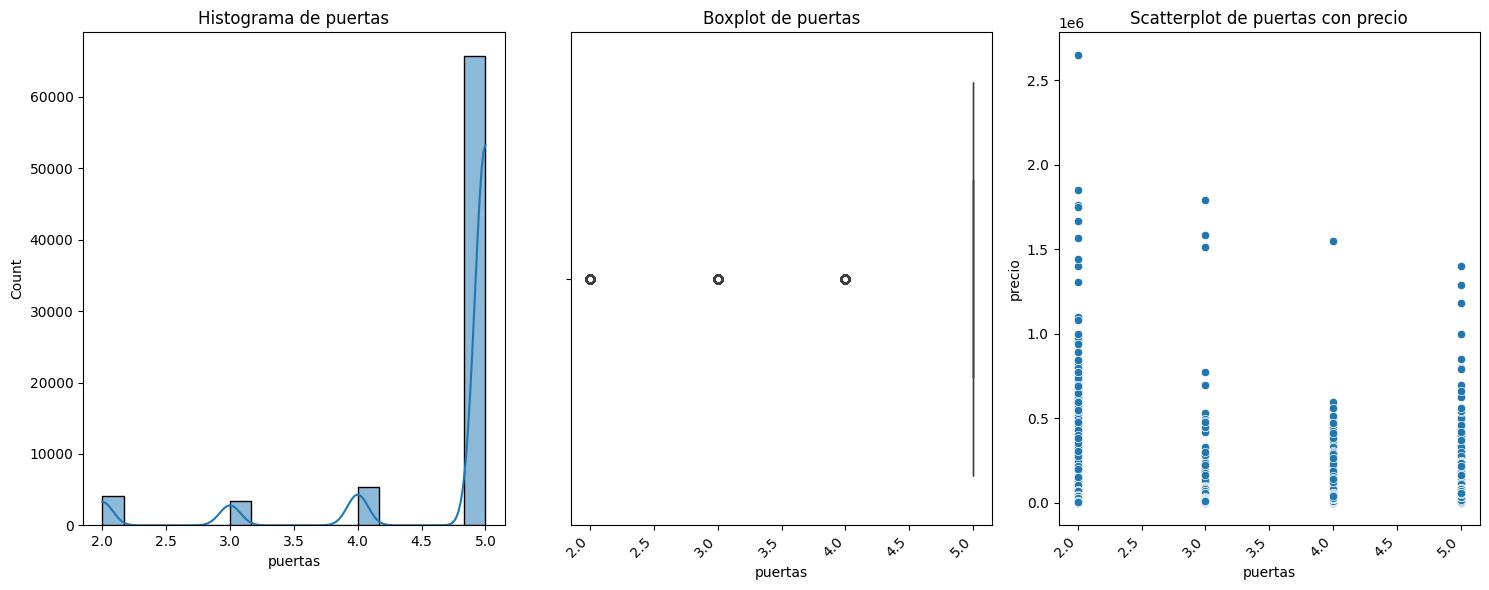

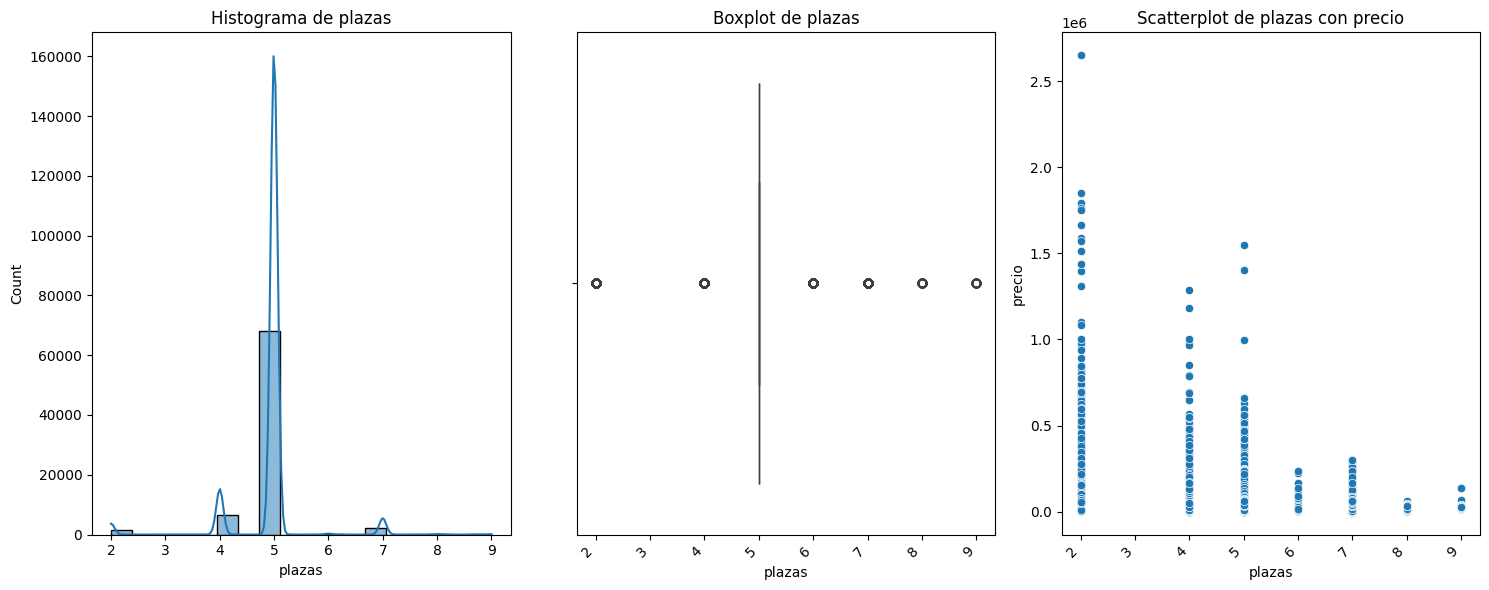

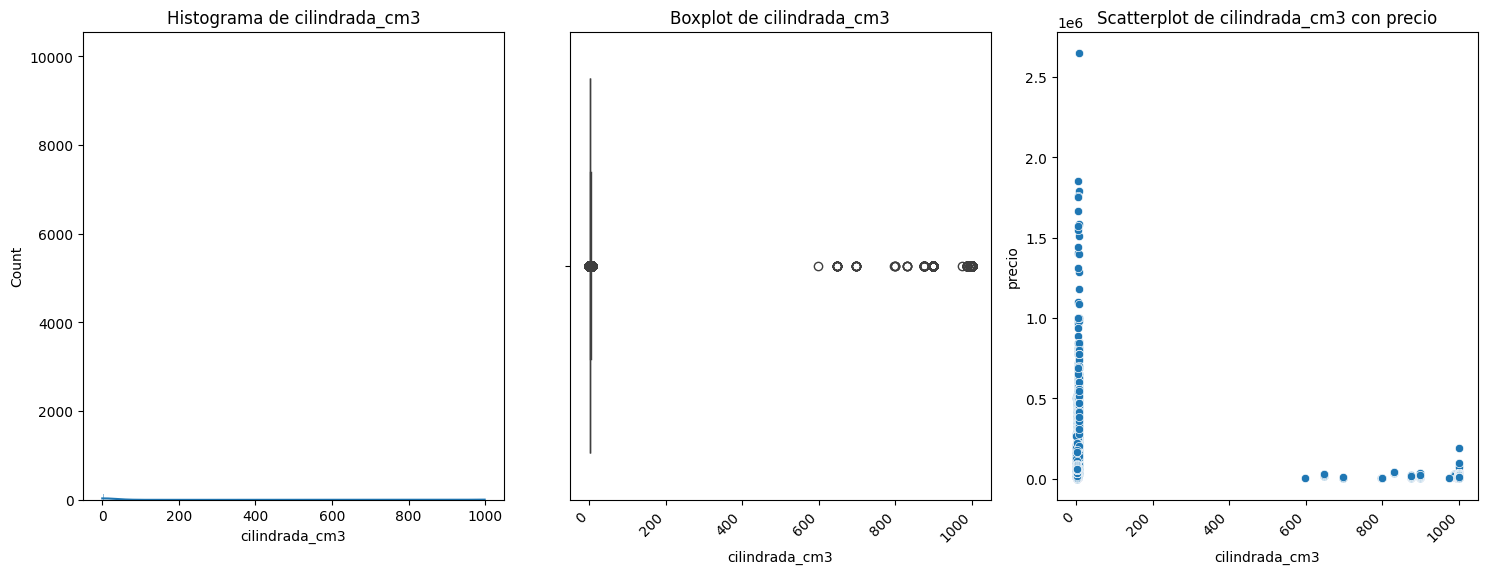

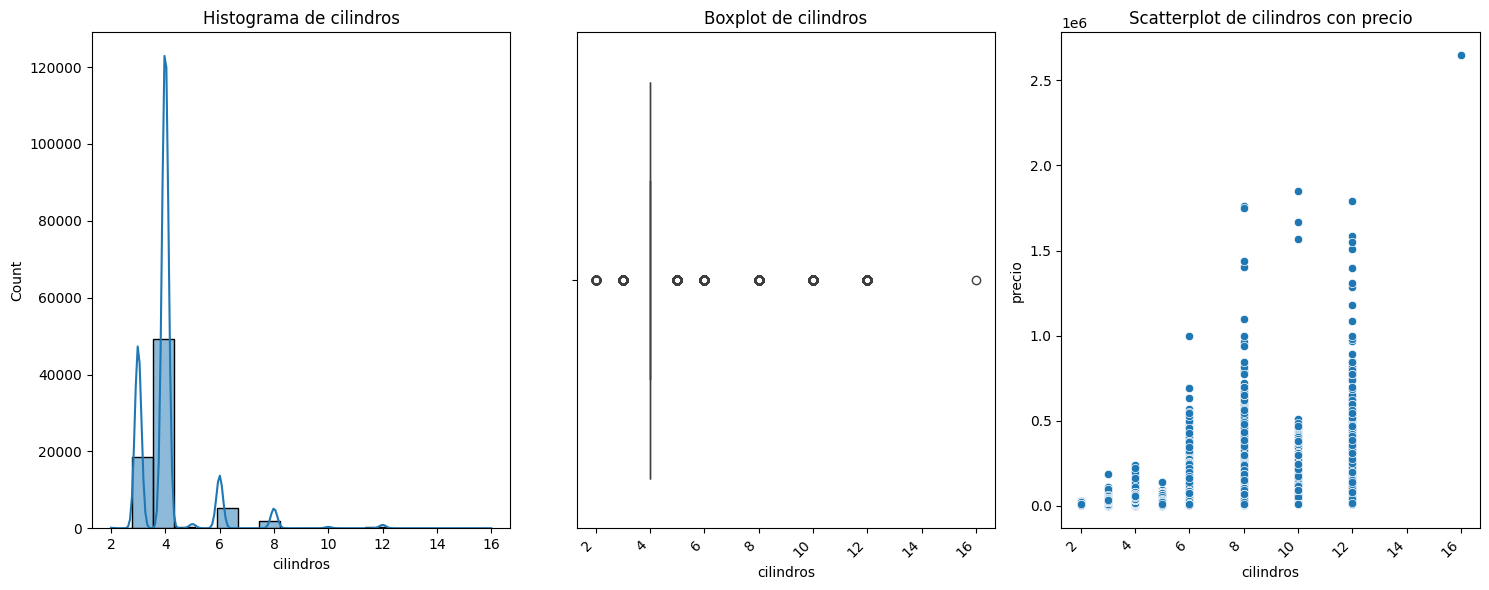

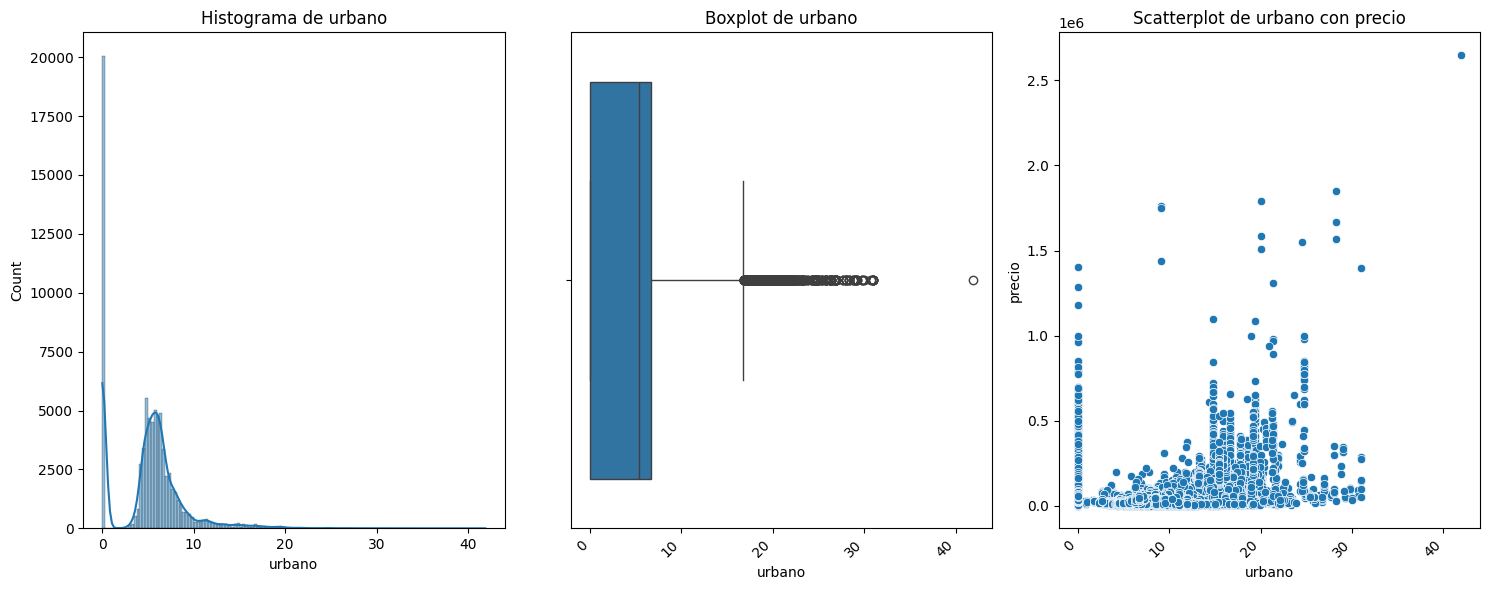

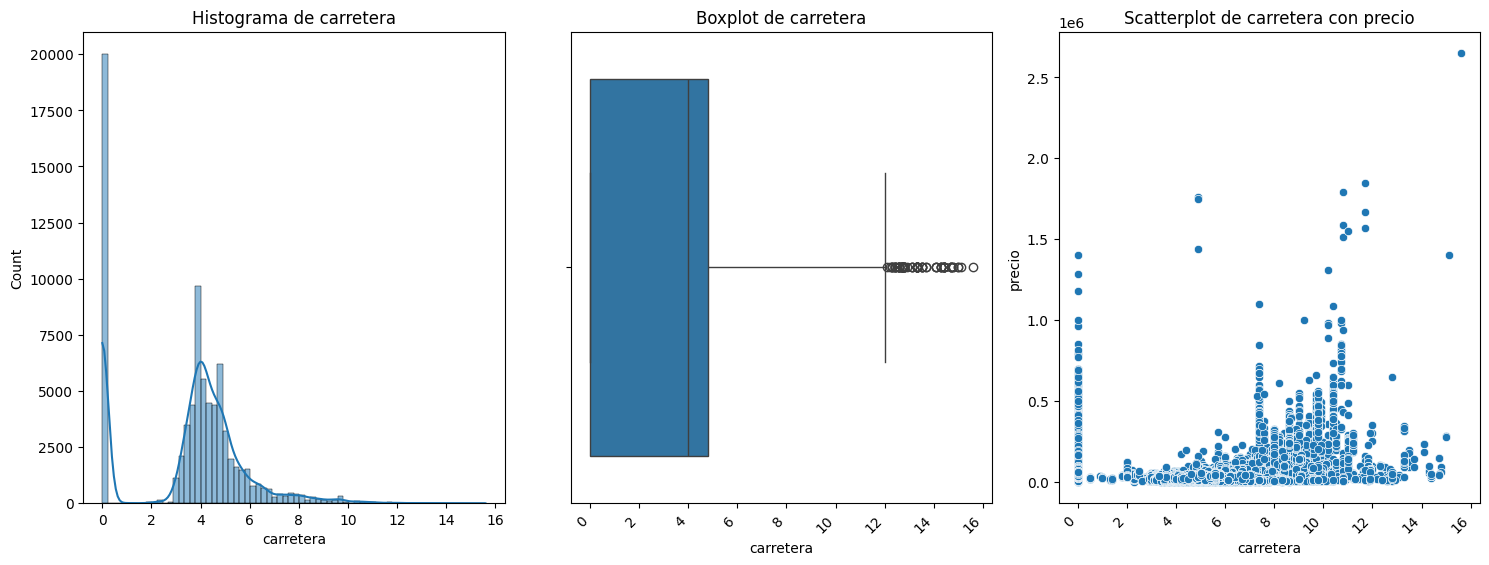

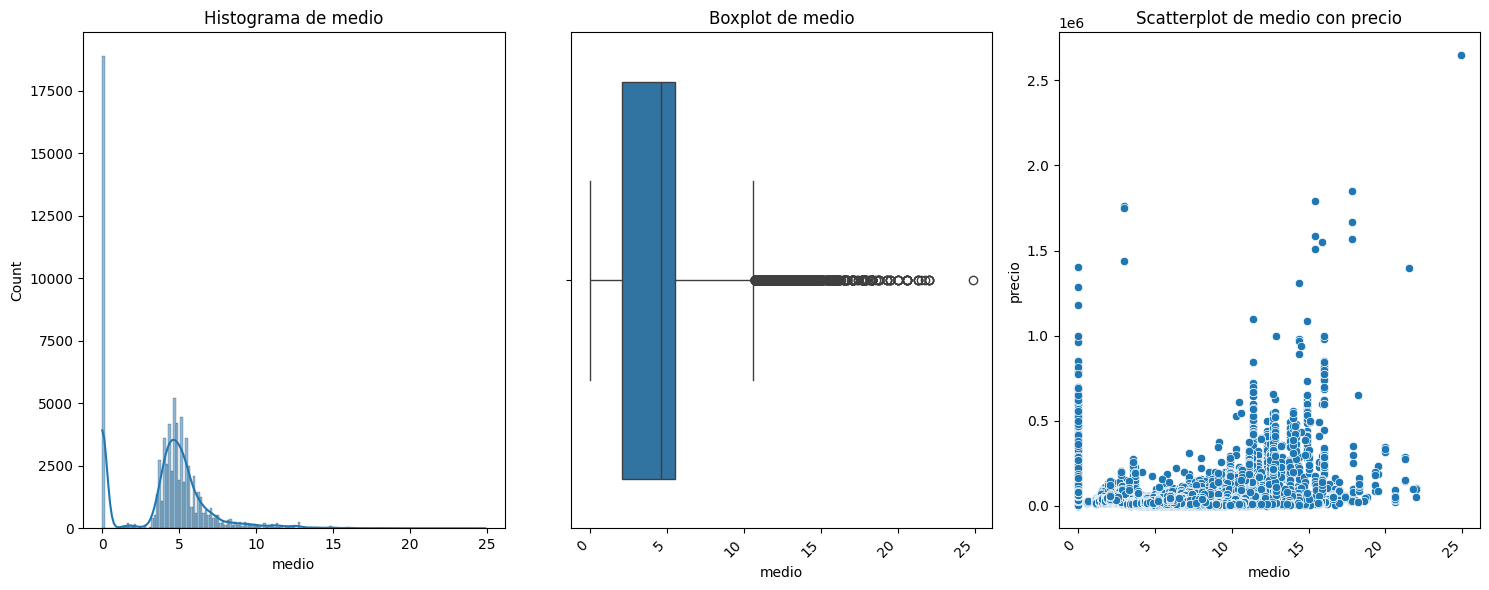

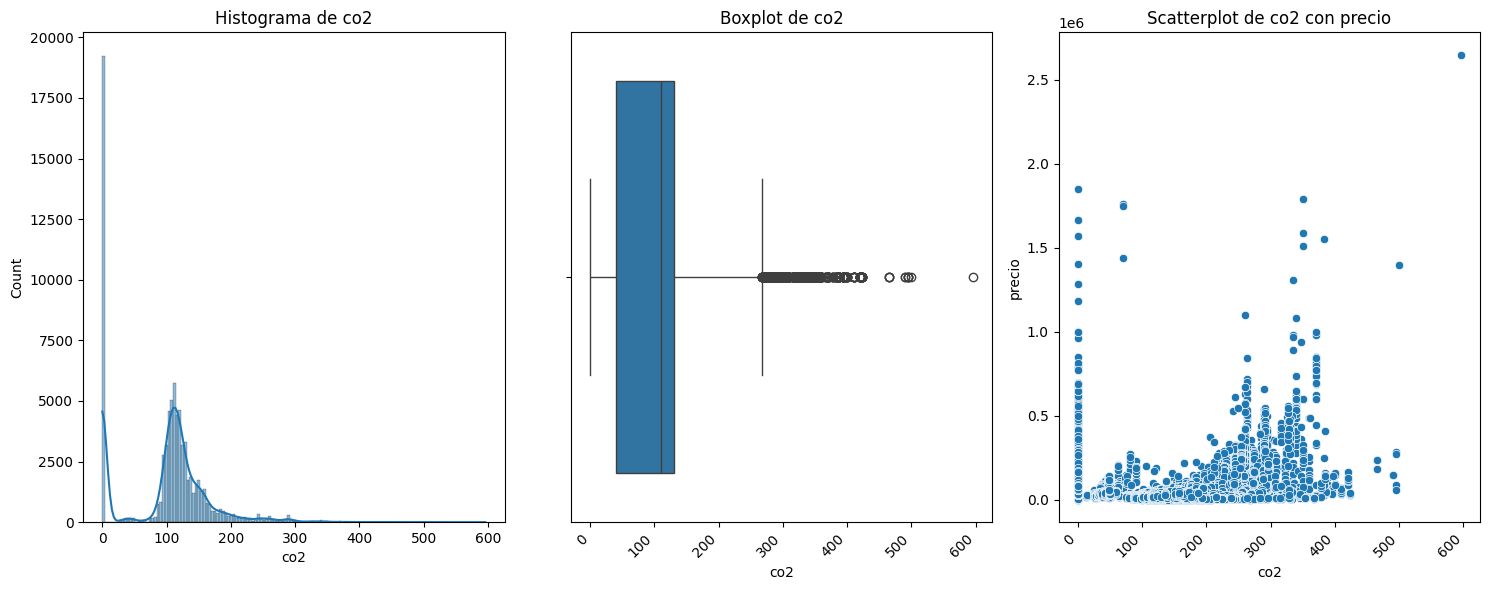

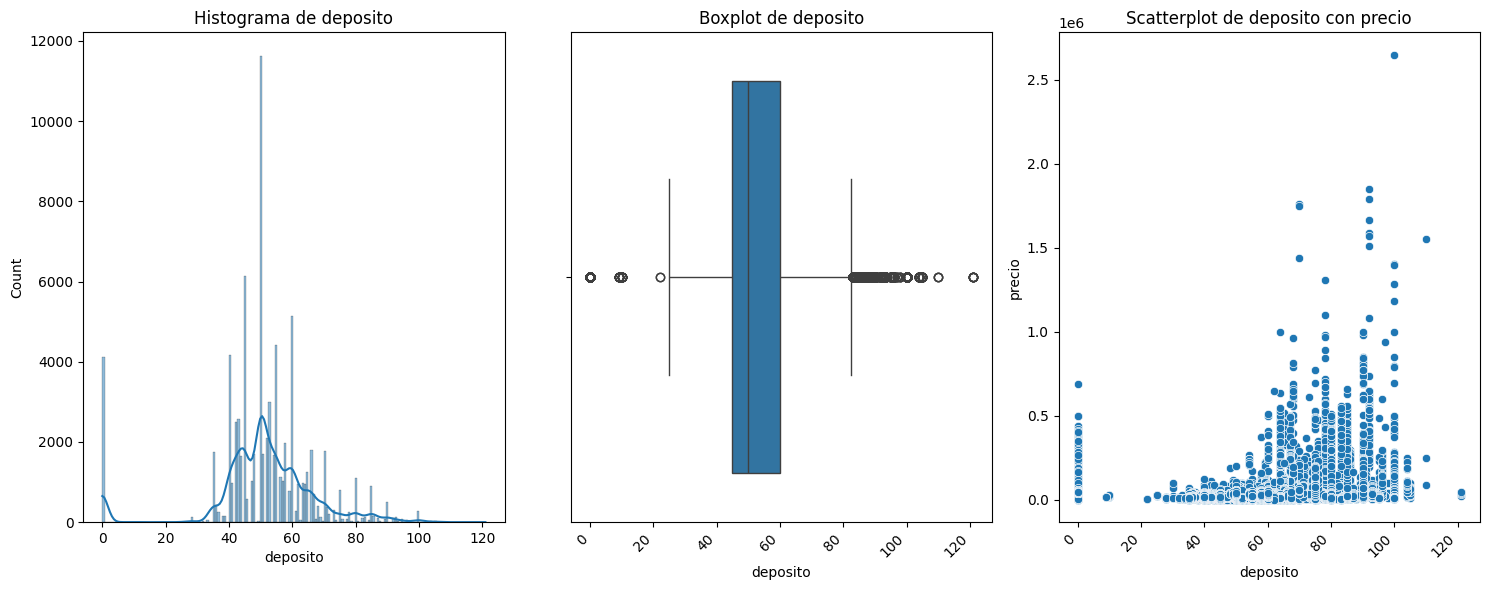

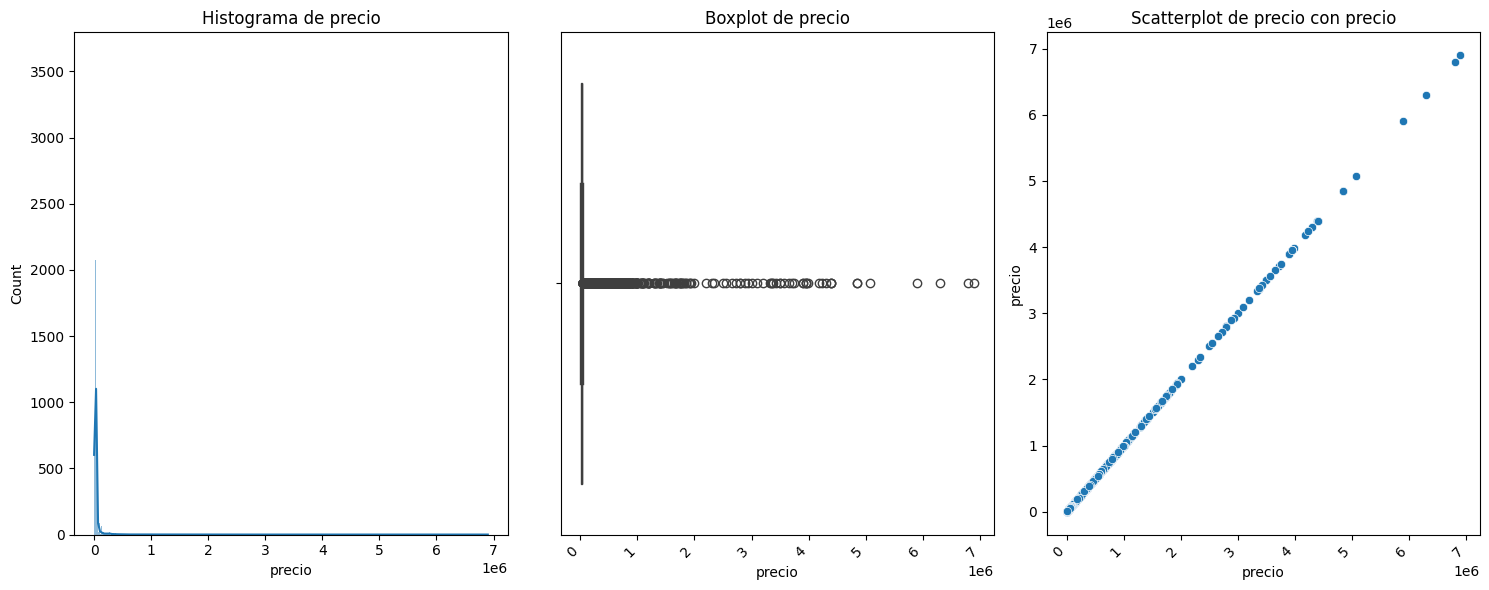

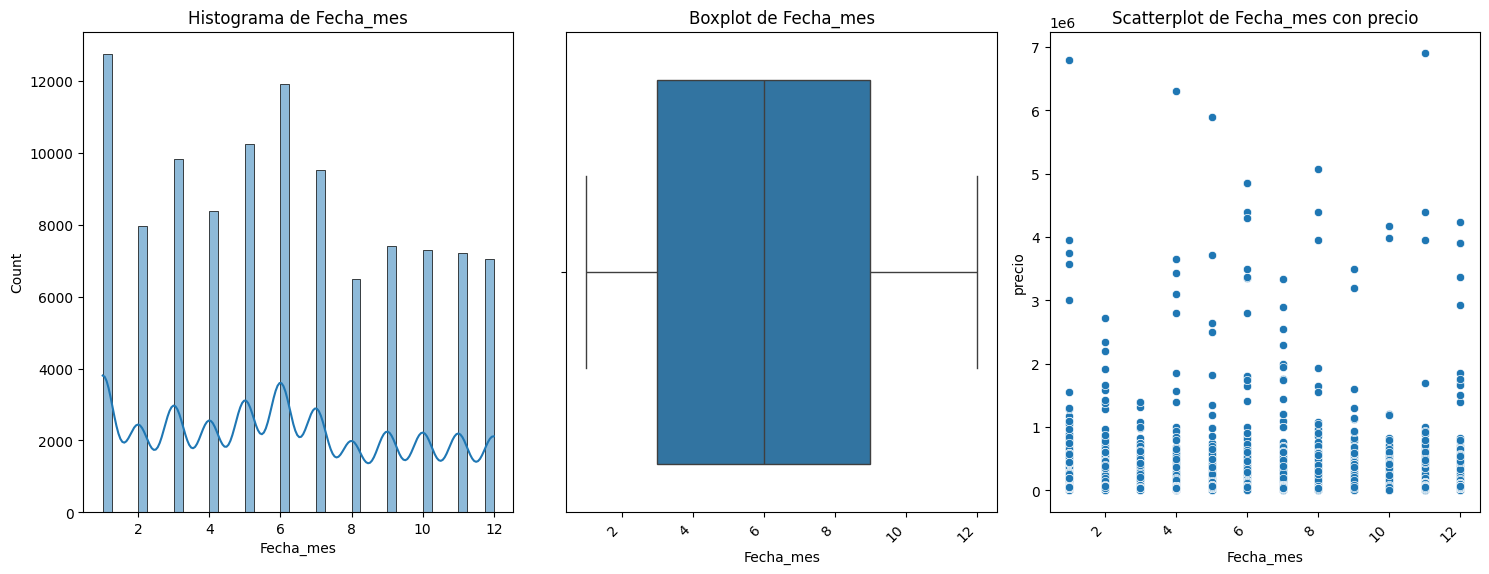

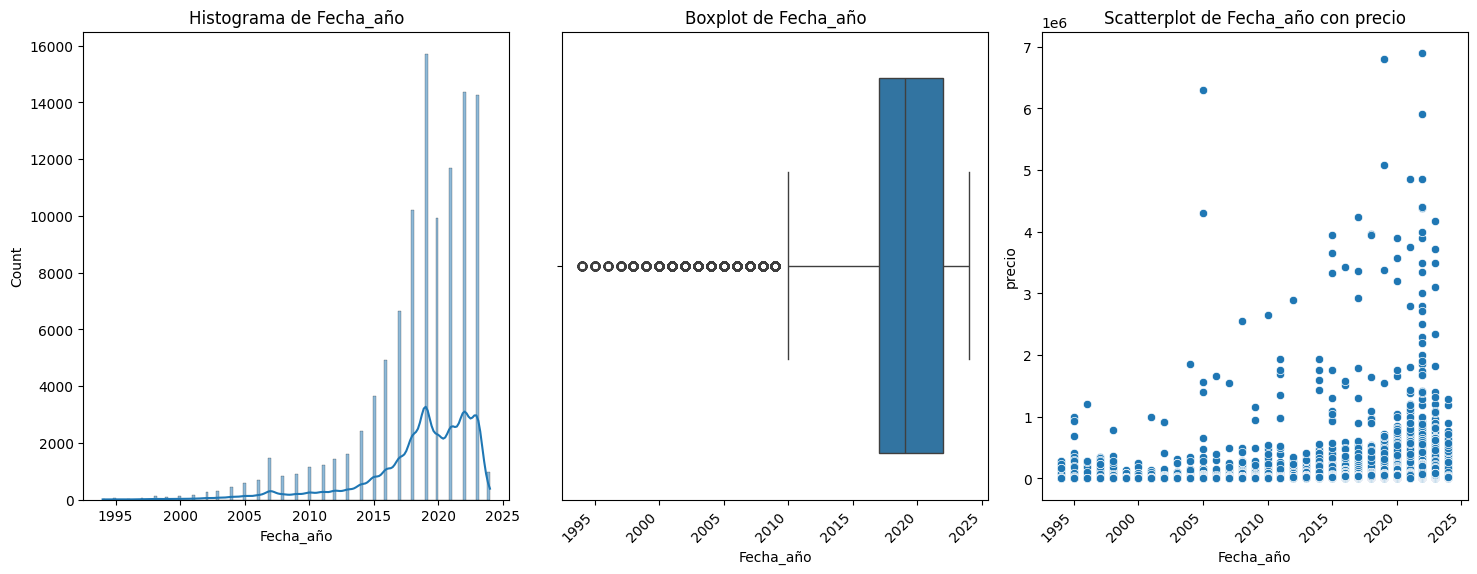

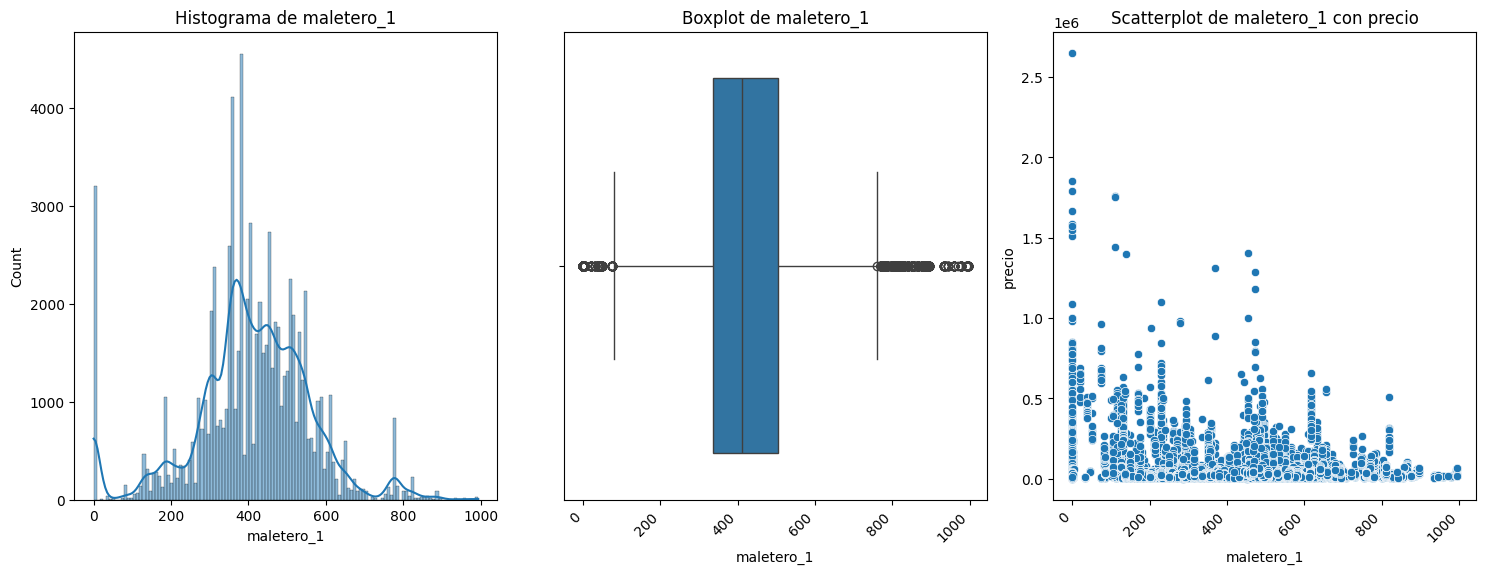

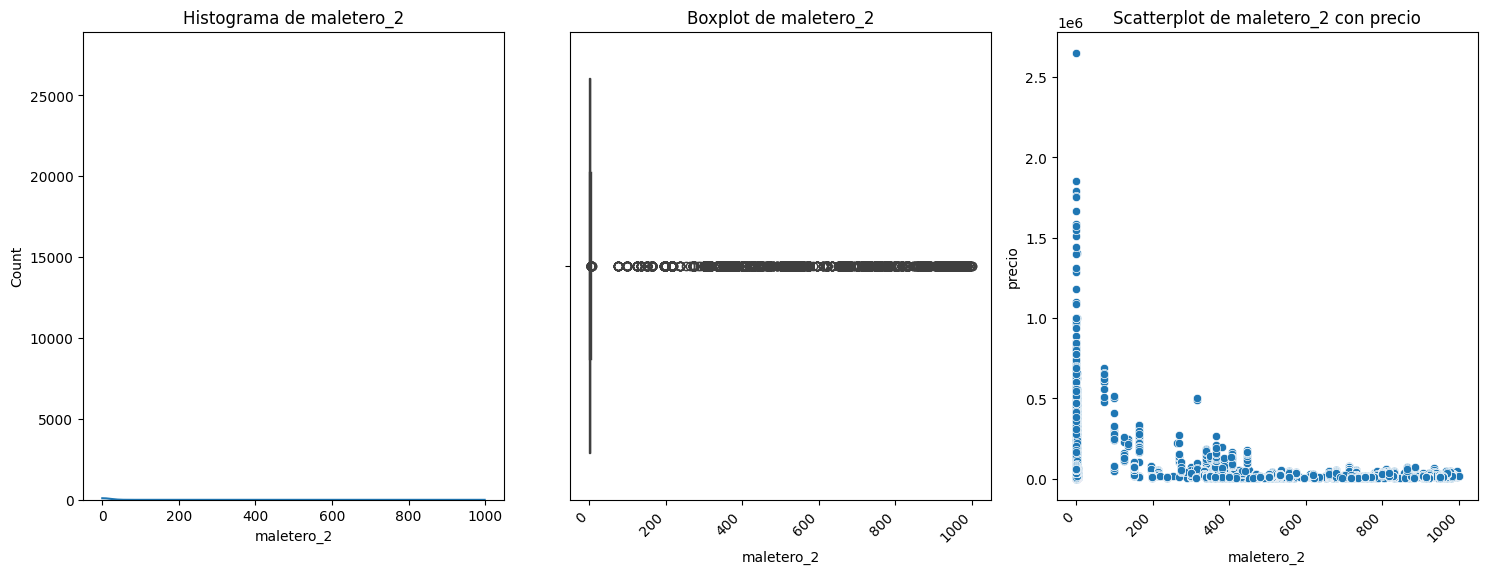

In [37]:
for columna in continuous_columns:
    metricas(df, columna)

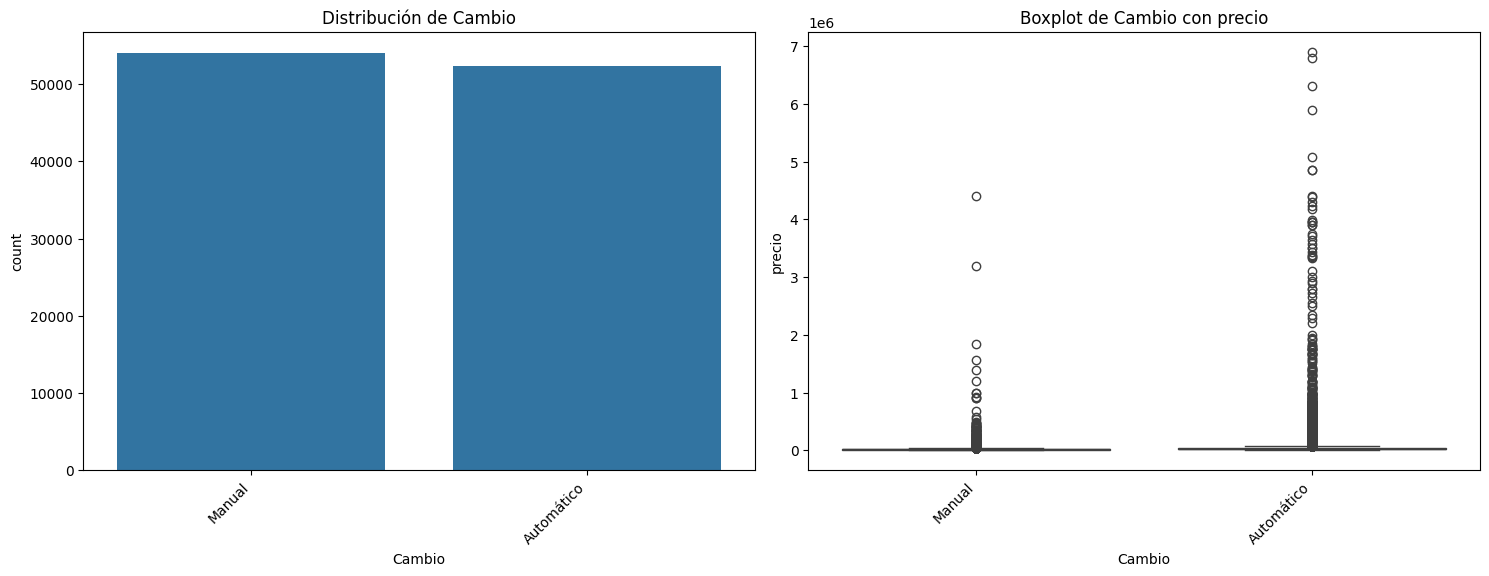

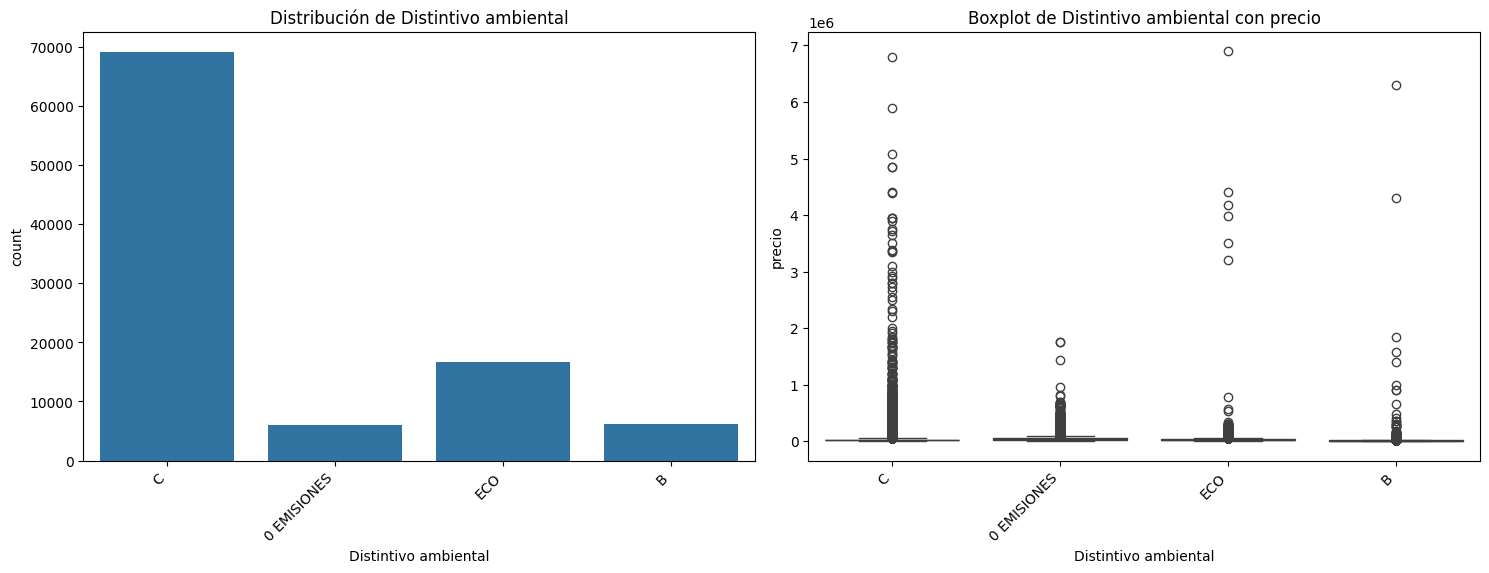

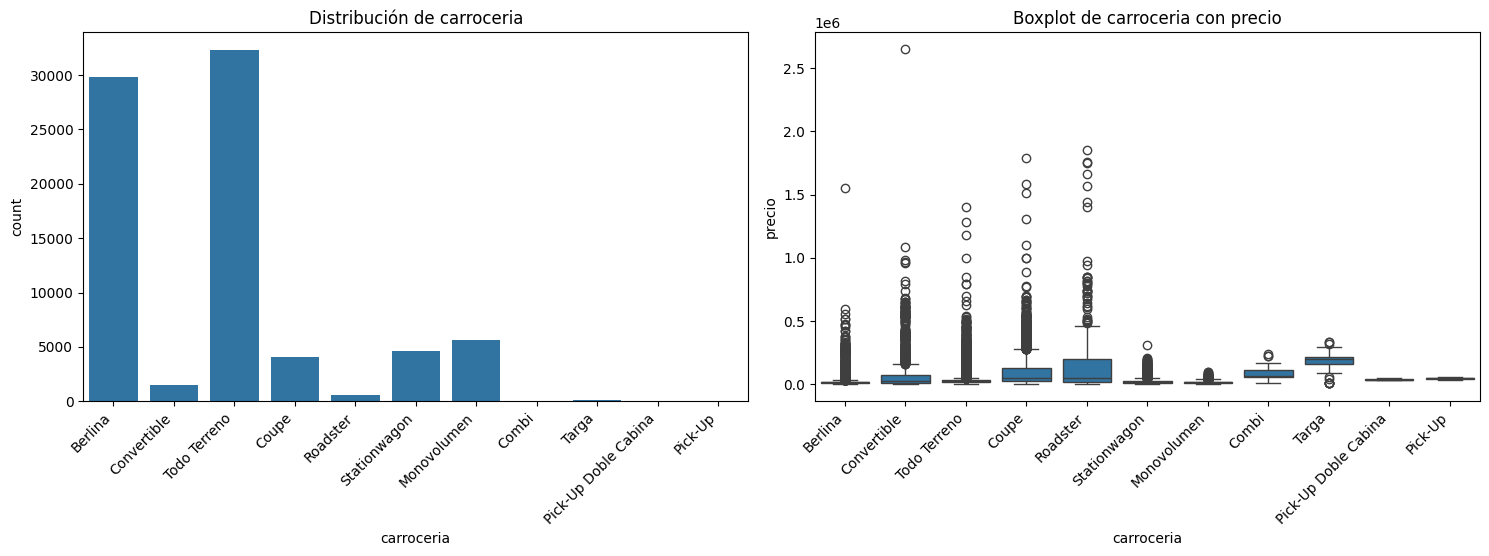

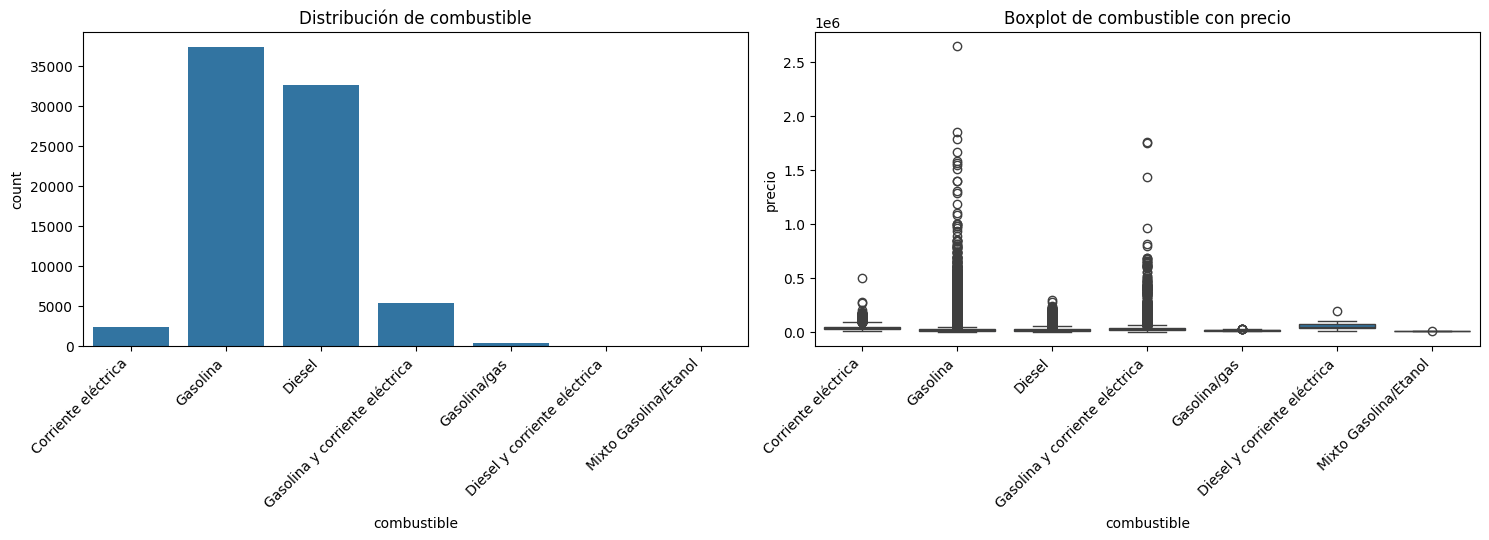

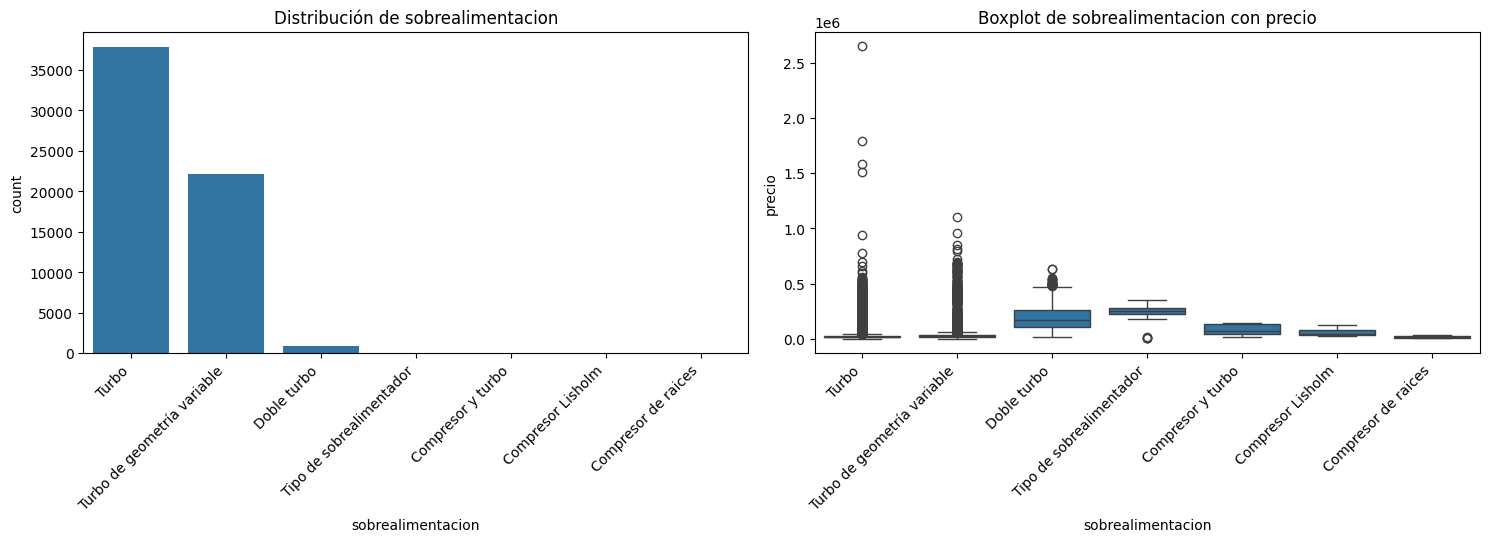

In [38]:
for columna in categorical_columns:
    metricas(df, columna)

In [39]:
df.columns

Index(['Kilómetros', 'Cambio', 'Potencia (cv)', 'Garantía',
       'Distintivo ambiental', 'largo', 'ancho', 'alto', 'batalla_mm',
       'peso_masa_kg', 'carroceria', 'puertas', 'plazas', 'combustible',
       'cilindrada_cm3', 'cilindros', 'sobrealimentacion', 'urbano',
       'carretera', 'medio', 'co2', 'deposito', 'precio', 'Fecha_mes',
       'Fecha_año', 'maletero_1', 'maletero_2'],
      dtype='object')

-98718.75 262575.0
98.53201007480922


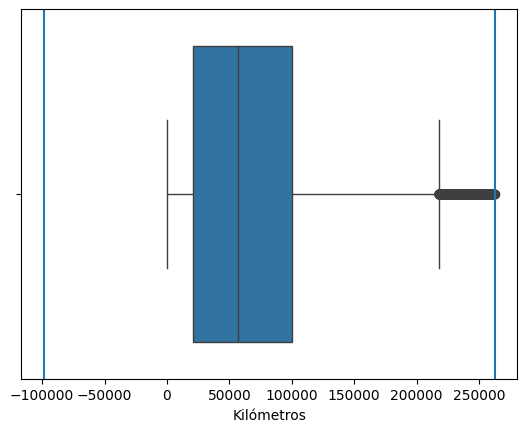

In [40]:


q1 = df["Kilómetros"].quantile(q = 0.25)
q3 = df["Kilómetros"].quantile(q = 0.75)
#k = 7
ric = q3 - q1

lim_l = q1 - 1.5*ric
lim_r = q3 + 2*ric

print(lim_l, lim_r)

print(df[df["Kilómetros"].between(lim_l, lim_r) | df["Kilómetros"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["Kilómetros"].isna()) | ((df["Kilómetros"] >= lim_l) & (df["Kilómetros"] <= lim_r))]


sns.boxplot(x = df["Kilómetros"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()


694.0
99.43247934987886


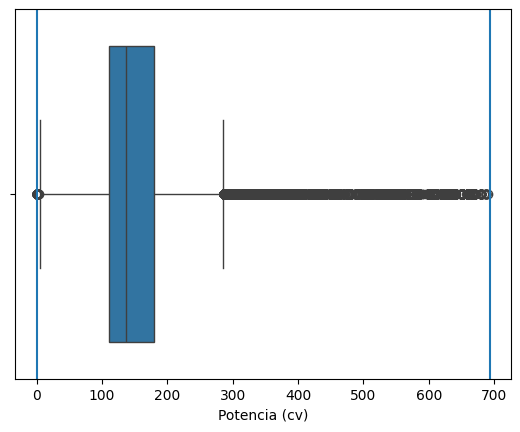

In [41]:

q1 = df["Potencia (cv)"].quantile(q = 0.25)
q3 = df["Potencia (cv)"].quantile(q = 0.75)
#k = 7
ric = q3 - q1

lim_l = q1 - 1.5*ric
lim_r = q3 + 7*ric

print(lim_r)

print(df[df["Potencia (cv)"].between(lim_l, lim_r) | df["Potencia (cv)"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["Potencia (cv)"].isna()) | (df["Potencia (cv)"] <= lim_r)]


sns.boxplot(x = df["Potencia (cv)"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()


In [42]:
z=3
mean = df["Garantía"].mean()
std = df["Garantía"].std()
    
lim_l = mean - z*std
lim_r = mean + z*std
    
df = df[df["Garantía"].between(lim_l, lim_r) | df["Garantía"].isna()]
porcentaje = df.shape[0] / df.shape[0] * 100
print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {"Garantía"} después de eliminar los outliers.')

Se mantienen el 100.00% de los datos en la columna Garantía después de eliminar los outliers.


3182.5 5636.5
99.80430152913414


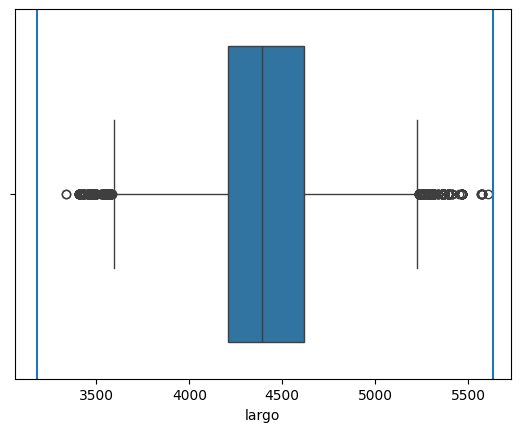

In [43]:

q1 = df["largo"].quantile(q = 0.25)
q3 = df["largo"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["largo"].between(lim_l, lim_r) | df["largo"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["largo"].isna()) | ((df["largo"] >= lim_l) & (df["largo"] <= lim_r))]


sns.boxplot(x = df["largo"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()


1556.0 2074.0
99.76354793440858


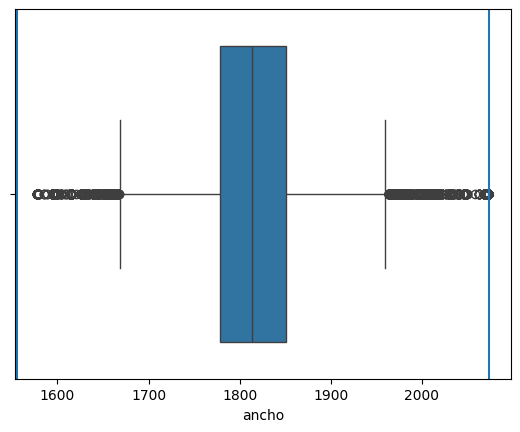

In [44]:
q1 = df["ancho"].quantile(q = 0.25)
q3 = df["ancho"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["ancho"].between(lim_l, lim_r) | df["ancho"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["ancho"].isna()) | ((df["ancho"] >= lim_l) & (df["ancho"] <= lim_r))]


sns.boxplot(x = df["ancho"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

1111.0 1966.0
99.7706952366271


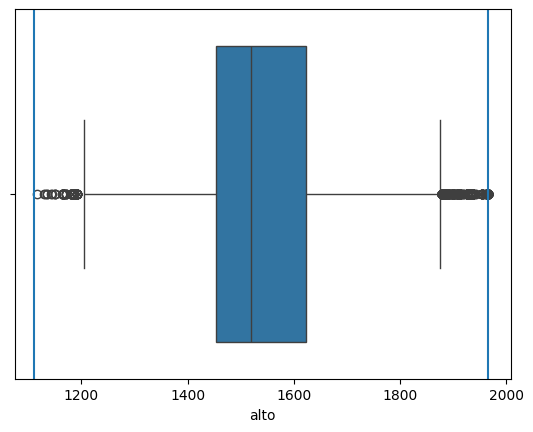

In [45]:
q1 = df["alto"].quantile(q = 0.25)
q3 = df["alto"].quantile(q = 0.75)
k = 2
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["alto"].between(lim_l, lim_r) | df["alto"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["alto"].isna()) | ((df["alto"] >= lim_l) & (df["alto"] <= lim_r))]


sns.boxplot(x = df["alto"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

2142.0 3171.0
99.50653765185315


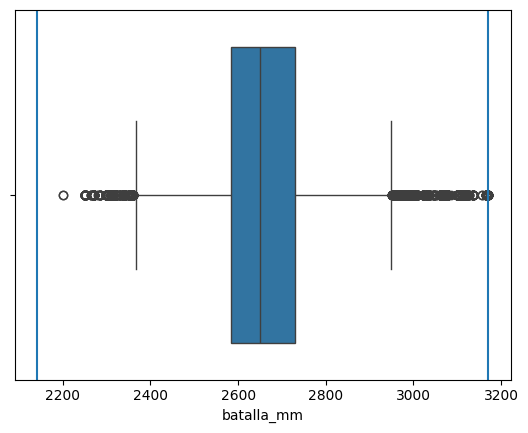

In [46]:
q1 = df["batalla_mm"].quantile(q = 0.25)
q3 = df["batalla_mm"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["batalla_mm"].between(lim_l, lim_r) | df["batalla_mm"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["batalla_mm"].isna()) | ((df["batalla_mm"] >= lim_l) & (df["batalla_mm"] <= lim_r))]


sns.boxplot(x = df["batalla_mm"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

757.5 3127.5
99.32358335840378


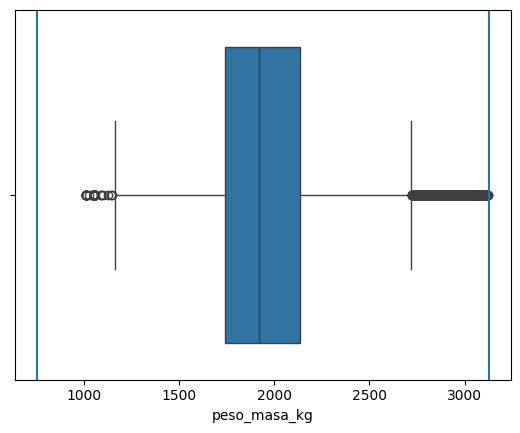

In [47]:
q1 = df["peso_masa_kg"].quantile(q = 0.25)
q3 = df["peso_masa_kg"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["peso_masa_kg"].between(lim_l, lim_r) | df["peso_masa_kg"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["peso_masa_kg"].isna()) | ((df["peso_masa_kg"] >= lim_l) & (df["peso_masa_kg"] <= lim_r))]


sns.boxplot(x = df["peso_masa_kg"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [48]:
z=3
mean = df["puertas"].mean()
std = df["puertas"].std()
    
lim_l = mean - z*std
lim_r = mean + z*std
    
df = df[df["puertas"].between(lim_l, lim_r) | df["puertas"].isna()]
porcentaje = df.shape[0] / df.shape[0] * 100
print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {"plazas"} después de eliminar los outliers.')

Se mantienen el 100.00% de los datos en la columna plazas después de eliminar los outliers.


In [49]:
z=3
mean = df["plazas"].mean()
std = df["plazas"].std()
    
lim_l = mean - z*std
lim_r = mean + z*std
    
df = df[df["plazas"].between(lim_l, lim_r) | df["puertas"].isna()]
porcentaje = df.shape[0] / df.shape[0] * 100
print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {"plazas"} después de eliminar los outliers.')

Se mantienen el 100.00% de los datos en la columna plazas después de eliminar los outliers.


-16.25 22.75
99.97617098869675


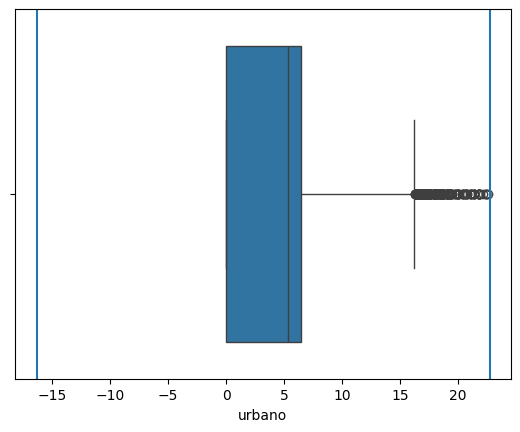

In [50]:
q1 = df["urbano"].quantile(q = 0.25)
q3 = df["urbano"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 2.5*ric

print(lim_l, lim_r)

print(df[df["urbano"].between(lim_l, lim_r) | df["urbano"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["urbano"].isna()) | (df["urbano"] <= lim_r)]


sns.boxplot(x = df["urbano"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

-11.75 11.75
99.98445563638624


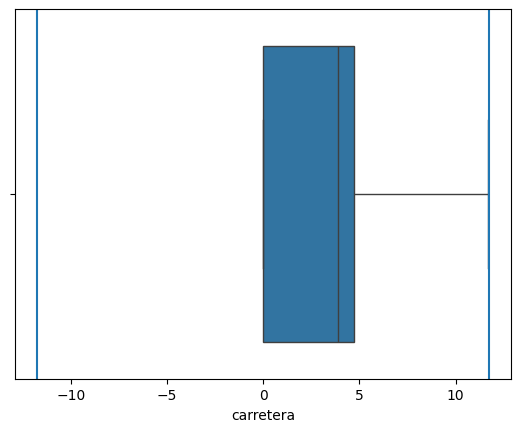

In [51]:
q1 = df["carretera"].quantile(q = 0.25)
q3 = df["carretera"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 1.5*ric

print(lim_l, lim_r)

print(df[df["carretera"].between(lim_l, lim_r) | df["carretera"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["carretera"].isna()) | (df["carretera"] <= lim_r)]


sns.boxplot(x = df["carretera"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

-8.35 15.05
99.99689064394764


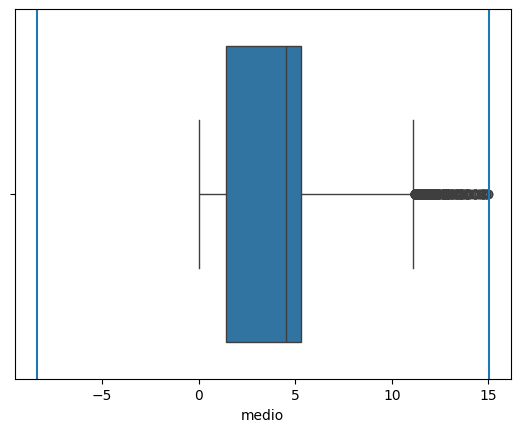

In [52]:
q1 = df["medio"].quantile(q = 0.25)
q3 = df["medio"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 2.5*ric

print(lim_l, lim_r)

print(df[df["medio"].between(lim_l, lim_r) | df["medio"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["medio"].isna()) | (df["medio"] <= lim_r)]


sns.boxplot(x = df["medio"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

-170.5 552.0
100.0


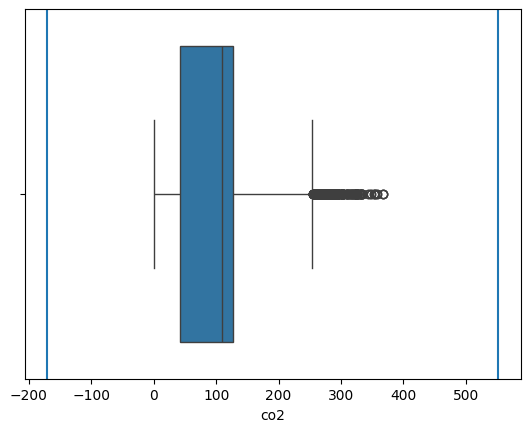

In [53]:
q1 = df["co2"].quantile(q = 0.25)
q3 = df["co2"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 5*ric

print(lim_l, lim_r)

print(df[df["co2"].between(lim_l, lim_r) | df["co2"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["co2"].isna()) | (df["co2"] <= lim_r)]


sns.boxplot(x = df["co2"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

5.0 96.0
96.33499170812604


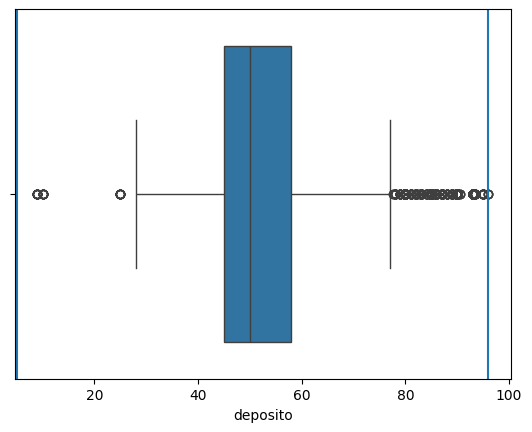

In [54]:
q1 = df["deposito"].quantile(q = 0.25)
q3 = df["deposito"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["deposito"].between(lim_l, lim_r) | df["deposito"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["deposito"].isna()) | ((df["deposito"] >= lim_l) & (df["deposito"] <= lim_r))]


sns.boxplot(x = df["deposito"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

2002.0 2037.0
99.84506799793425


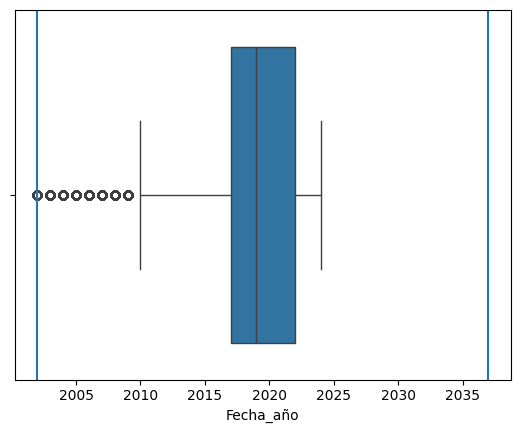

In [55]:
q1 = df["Fecha_año"].quantile(q = 0.25)
q3 = df["Fecha_año"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["Fecha_año"].between(lim_l, lim_r) | df["Fecha_año"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["Fecha_año"].isna()) | ((df["Fecha_año"] >= lim_l))]


sns.boxplot(x = df["Fecha_año"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

53.0 808.0
98.5021551724138


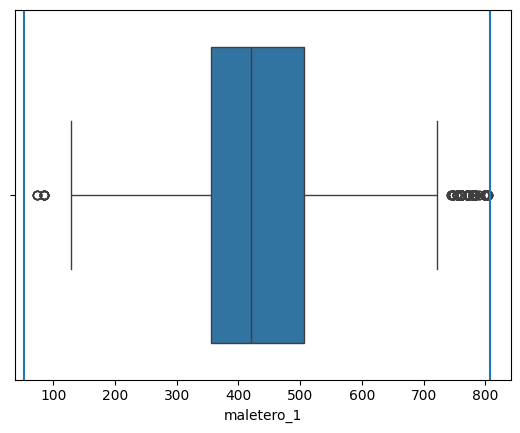

In [56]:
q1 = df["maletero_1"].quantile(q = 0.25)
q3 = df["maletero_1"].quantile(q = 0.75)
k = 2
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["maletero_1"].between(lim_l, lim_r) | df["maletero_1"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["maletero_1"].isna()) | ((df["maletero_1"] >= lim_l) & (df["maletero_1"] <= lim_r))]


sns.boxplot(x = df["maletero_1"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [57]:
df.shape 

#Motivo de preocupación, imagino

(91410, 27)

In [58]:
cambio_encoder = LabelEncoder()

df['Cambio'] = cambio_encoder.fit_transform(df['Cambio'].values)

In [59]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

for columna in categorical_columns:
    if columna != "Cambio":
        
        encoded = encoder.fit_transform(df[[columna]])
        
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([columna]), index=df.index)
        
        df = df.drop(columna, axis=1)
        df = pd.concat([df, encoded_df], axis=1)

In [60]:
df.columns

Index(['Kilómetros', 'Cambio', 'Potencia (cv)', 'Garantía', 'largo', 'ancho',
       'alto', 'batalla_mm', 'peso_masa_kg', 'puertas', 'plazas',
       'cilindrada_cm3', 'cilindros', 'urbano', 'carretera', 'medio', 'co2',
       'deposito', 'precio', 'Fecha_mes', 'Fecha_año', 'maletero_1',
       'maletero_2', 'Distintivo ambiental_B', 'Distintivo ambiental_C',
       'Distintivo ambiental_ECO', 'Distintivo ambiental_nan',
       'carroceria_Combi', 'carroceria_Convertible', 'carroceria_Coupe',
       'carroceria_Monovolumen', 'carroceria_Roadster',
       'carroceria_Stationwagon', 'carroceria_Todo Terreno', 'carroceria_nan',
       'combustible_Diesel', 'combustible_Diesel y corriente eléctrica',
       'combustible_Gasolina', 'combustible_Gasolina y corriente eléctrica',
       'combustible_Gasolina/gas', 'combustible_Mixto Gasolina/Etanol',
       'combustible_nan', 'sobrealimentacion_Compresor de raices',
       'sobrealimentacion_Doble turbo',
       'sobrealimentacion_Tipo de sob

In [61]:
categorical_columns = df.columns.difference(continuous_columns)

In [62]:
print(df.isna().sum())

Kilómetros                                           0
Cambio                                               0
Potencia (cv)                                     1986
Garantía                                          7959
largo                                            27309
ancho                                            27309
alto                                             27323
batalla_mm                                       27309
peso_masa_kg                                     27309
puertas                                          27309
plazas                                           27309
cilindrada_cm3                                   27309
cilindros                                        27313
urbano                                           27309
carretera                                        27309
medio                                            27309
co2                                              27309
deposito                                         27309
precio    

In [63]:
columnas_imputer = columnas_imputer = ['Potencia (cv)', 'Garantía', 'largo', 'ancho', 'alto','batalla_mm', 'peso_masa_kg', 'puertas', 'plazas', 'cilindrada_cm3','cilindros', 'urbano', 'carretera', 'medio', 'co2', 'deposito', 'precio', 'Fecha_mes', 'maletero_1', 'maletero_2']


imputer = KNNImputer(n_neighbors=10)

imputer.set_output(transform="pandas")

df[columnas_imputer] = imputer.fit_transform(df[columnas_imputer])

In [64]:
print(df.isna().sum())

Kilómetros                                       0
Cambio                                           0
Potencia (cv)                                    0
Garantía                                         0
largo                                            0
ancho                                            0
alto                                             0
batalla_mm                                       0
peso_masa_kg                                     0
puertas                                          0
plazas                                           0
cilindrada_cm3                                   0
cilindros                                        0
urbano                                           0
carretera                                        0
medio                                            0
co2                                              0
deposito                                         0
precio                                           0
Fecha_mes                      

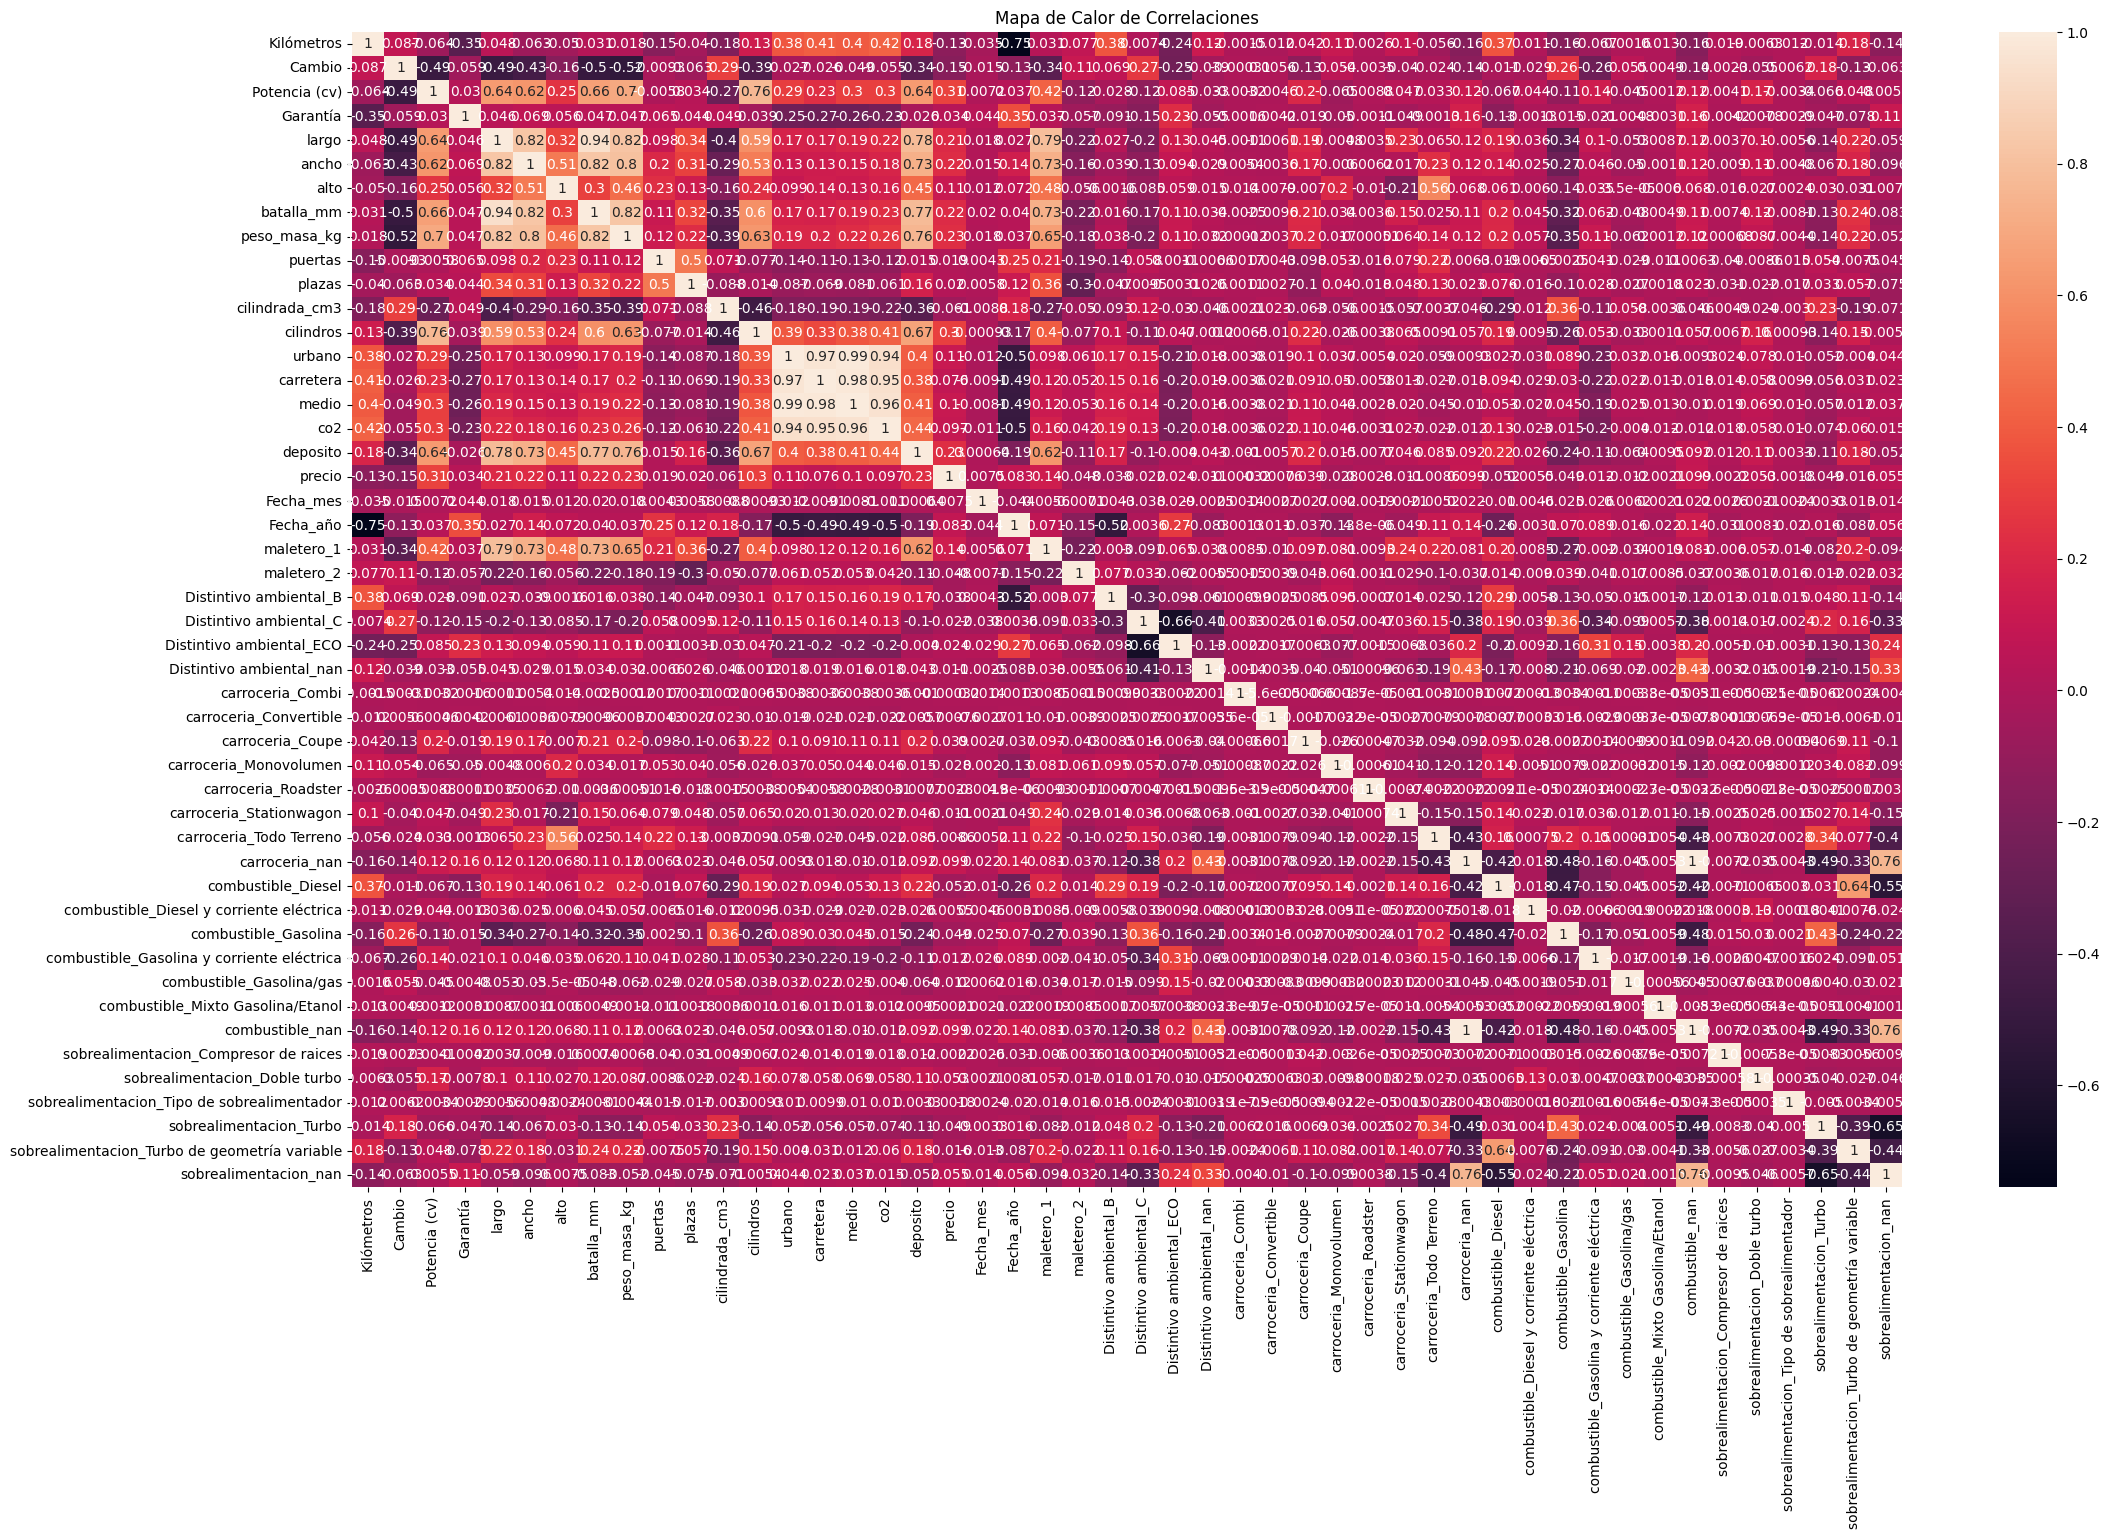

In [65]:
correlation_matrix = df.corr()

plt.figure(figsize=(25, 15))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Mapa de Calor de Correlaciones')
plt.show()

precio                                           1.000000
Potencia (cv)                                    0.311142
cilindros                                        0.298632
deposito                                         0.231726
peso_masa_kg                                     0.227297
ancho                                            0.224765
batalla_mm                                       0.216091
largo                                            0.211286
maletero_1                                       0.138892
urbano                                           0.112791
alto                                             0.110754
medio                                            0.104406
carroceria_nan                                   0.099195
combustible_nan                                  0.099195
co2                                              0.096554
Fecha_año                                        0.083170
carretera                                        0.076341
sobrealimentac

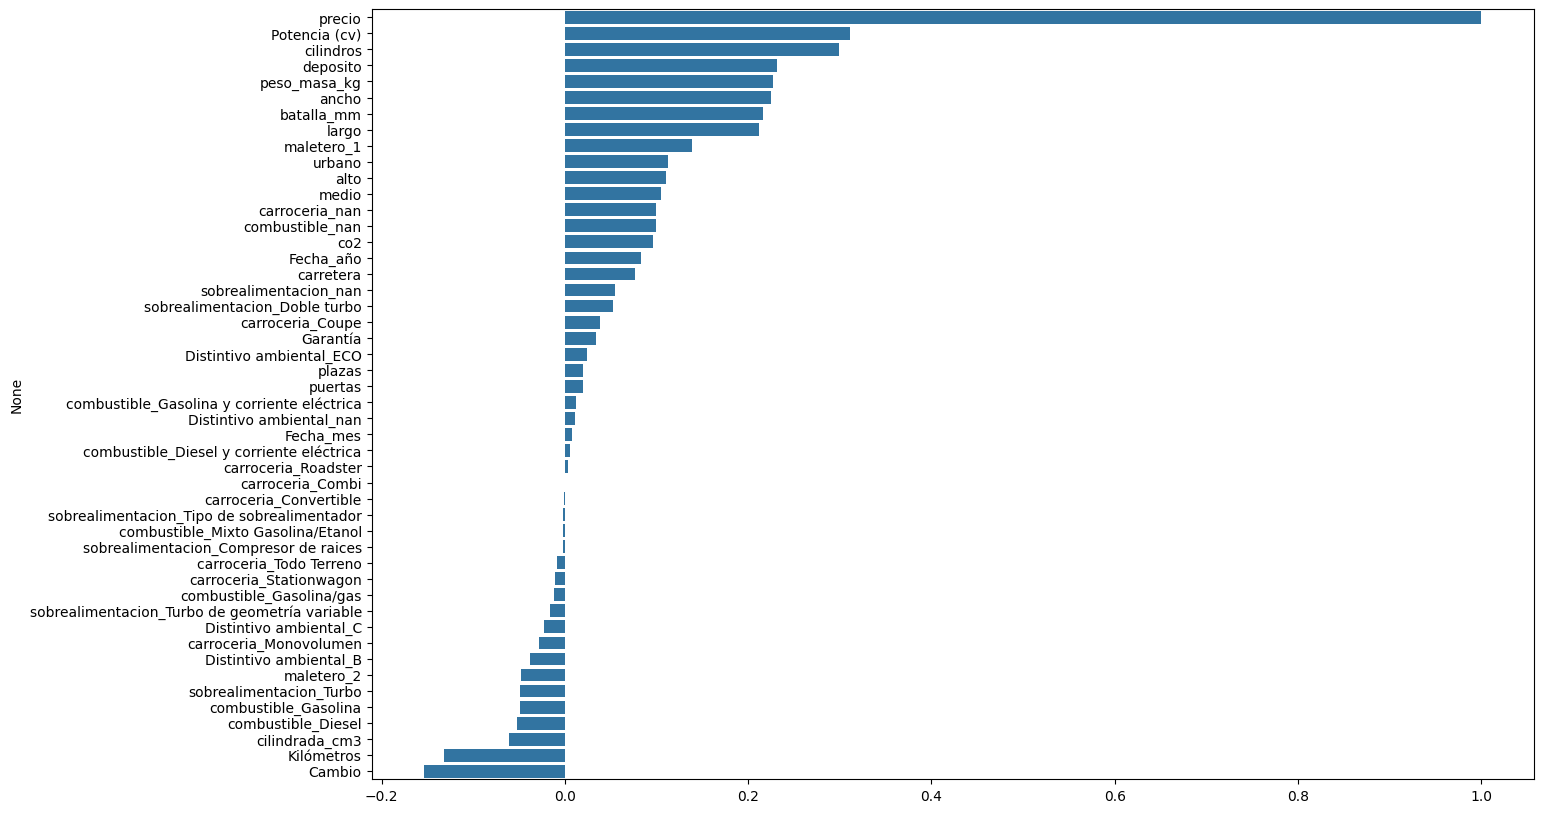

In [66]:
correlations = df.corr()['precio'].sort_values(ascending=False)

print(correlations)

plt.figure(figsize=(15, 10))
sns.barplot(x=correlations.values, y=correlations.index)
plt.show()

In [67]:
print(df.isna().sum())

Kilómetros                                       0
Cambio                                           0
Potencia (cv)                                    0
Garantía                                         0
largo                                            0
ancho                                            0
alto                                             0
batalla_mm                                       0
peso_masa_kg                                     0
puertas                                          0
plazas                                           0
cilindrada_cm3                                   0
cilindros                                        0
urbano                                           0
carretera                                        0
medio                                            0
co2                                              0
deposito                                         0
precio                                           0
Fecha_mes                      

In [68]:
df = df.dropna(subset=['precio'])

In [69]:
print(df.isna().sum())

Kilómetros                                       0
Cambio                                           0
Potencia (cv)                                    0
Garantía                                         0
largo                                            0
ancho                                            0
alto                                             0
batalla_mm                                       0
peso_masa_kg                                     0
puertas                                          0
plazas                                           0
cilindrada_cm3                                   0
cilindros                                        0
urbano                                           0
carretera                                        0
medio                                            0
co2                                              0
deposito                                         0
precio                                           0
Fecha_mes                      

In [70]:
print(df['precio'].isna().sum())

0


In [71]:
X = df.drop("precio", axis = 1)
y = df["precio"]

print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (91410, 47)
y: (91410,)


Feature Importance:
 1. feature  0 ( 0.24646388251760662): cilindrada_cm3
 2. feature  1 ( 0.21616450661034503): cilindros
 3. feature  2 ( 0.20904984278232566): Potencia (cv)
 4. feature  3 ( 0.06566913234644502): Kilómetros
 5. feature  4 ( 0.06470679296337083): Fecha_año
 6. feature  5 ( 0.05366276634929978): Distintivo ambiental_ECO
 7. feature  6 ( 0.04358754316592236): Garantía
 8. feature  7 (0.024210984323572625): Fecha_mes
 9. feature  8 (0.007403339821881787): carretera
10. feature  9 (0.007337782880386347): Distintivo ambiental_B
11. feature 10 (0.0072257069120106945): maletero_1
12. feature 11 (0.007138616811337882): ancho
13. feature 12 (0.007128337187052946): peso_masa_kg
14. feature 13 ( 0.00640162100242958): largo
15. feature 14 (0.005224228593478882): alto
16. feature 15 (0.004155254969890869): co2
17. feature 16 (0.0040688525716710425): batalla_mm
18. feature 17 (0.003543708833794899): Distintivo ambiental_nan
19. feature 18 (0.0031364439839203086): medio
20. feature 

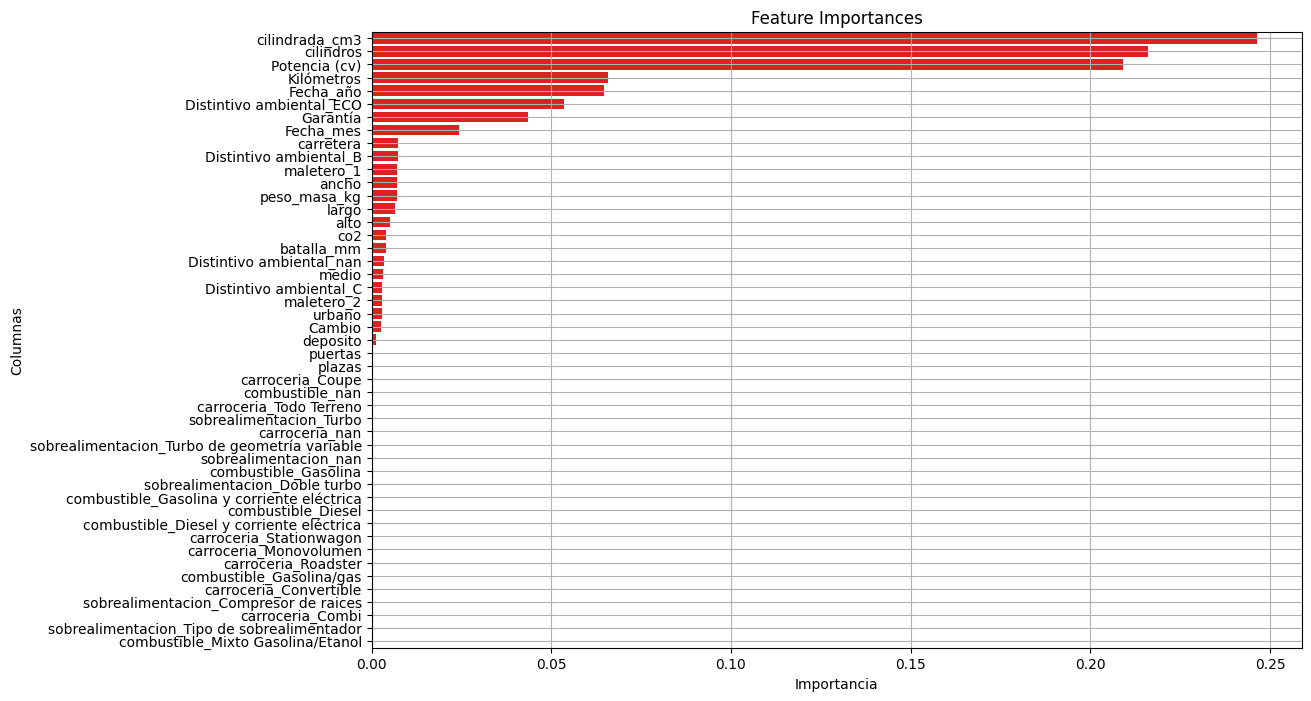

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Modelo de RandomForest para obtener Feature Importance
model = RandomForestRegressor(n_estimators = 250,
                               random_state = 0)
# Entrenamos el modelo
model.fit(X, y)

# Calculamos Feature Importance
importances = model.feature_importances_

df_importances = pd.DataFrame(data = zip(X.columns, importances),
                              columns = ["Columnas", "Importancia"])

df_importances = df_importances.sort_values("Importancia", ascending = False)

print("Feature Importance:")

for index, (feature, importance) in enumerate(df_importances.values):
    
    print(f"{index + 1:2}. feature {index:2} ({importance:20}): {feature}")

plt.figure(figsize = (12, 8))

plt.title("Feature Importances")
sns.barplot(x = df_importances["Importancia"], y = df_importances["Columnas"], color = "red")

plt.grid()
plt.show()